# Problem Formulation



This usecase aims to identify patterns that indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


# 2 - Getting Jupyter Ready

### 2.1 Import Python Libraries:


In [1]:

import numpy as np
import pandas as pd
import requests
import json
import psycopg2
from sqlalchemy import create_engine
import datetime
import sys
import os
import csv
import re
pd.set_option('display.max_columns', None)

from io import StringIO
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
from dotenv import load_dotenv
load_dotenv()
from sklearn.preprocessing import MultiLabelBinarizer
pd.set_option('max_colwidth', 350)
from fasttext import FastText

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm
from sklearn.metrics import classification_report,precision_score,recall_score,accuracy_score,f1_score,roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder


In [208]:
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

### 2.2 Adjust Jupyer Views: 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)


# 3. Reading & Understanding the data 

### 3.1 Importing the input files 

### columns_description

It is data dictionary which describes the meaning of the variables.

In [3]:
cols_desc = pd.read_csv('columns_description.xls')
cols_desc=cols_desc.drop(['Unnamed: 0'],axis=1)
display(cols_desc)


,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


### application data



It contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

In [4]:
app_data = pd.read_csv('application_data.csv')
app_data.sample(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
135844,257559,0,Cash loans,F,N,Y,1,202500.0,675000.0,19737.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-17690,-2292,-2473.0,-1175,NaN,1,1,0,1,0,0,NaN,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Restaurant,NaN,0.630658,0.336062,0.0722,NaN,0.9906,NaN,NaN,0.0,0.1379,0.1667,NaN,NaN,NaN,0.0484,NaN,0.0000,0.0735,NaN,0.9906,NaN,NaN,0.0,0.1379,0.1667,NaN,NaN,NaN,0.0504,NaN,0.0000,0.0729,NaN,0.9906,NaN,NaN,0.0,0.1379,0.1667,NaN,NaN,NaN,0.0492,NaN,0.0000,NaN,block of flats,0.0380,Panel,No,0.0,0.0,0.0,0.0,-1652.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
147774,271339,0,Cash loans,M,Y,N,3,900000.0,1971072.0,68643.0,1800000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-15944,-2147,-506.0,-2214,7.0,1,1,0,1,1,0,Managers,5.0,1,1,FRIDAY,14,0,1,1,0,1,1,Business Entity Type 3,0.811719,0.170095,0.280790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-446.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
204986,337633,0,Cash loans,M,N,N,0,270000.0,2250000.0,64615.5,2250000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.006671,-11875,-1708,-5312.0,-4287,NaN,1,1,1,1,1,0,NaN,1.0,2,2,THURSDAY,15,0,0,0,0,1,1,Business Entity Type 3,NaN,0.569729,0.643026,0.0072,0.0,0.9657,NaN,NaN,0.0,0.0345,0.0000,NaN,0.0262,NaN,0.0037,NaN,0.0072,0.0074,0.0,0.9657,NaN,NaN,0.0,0.0345,0.0000,NaN,0.0268,NaN,0.0038,NaN,0.0076,0.0073,0.0,0.9657,NaN,NaN,0.0,0.0345,0.0000,NaN,0.0266,NaN,0.0037,NaN,0.0074,NaN,block of flats,0.0049,"Stone, brick",No,0.0,0.0,0.0,0.0,-1228.0,0,1,0,0,0,0,0,0,0,0,0,0,

### previous app data

It contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer

In [5]:
prev_app_data = pd.read_csv('previous_application.csv')
prev_app_data.sample(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
993249,1571723,448793,Revolving loans,4500.00,90000.0,90000.0,NaN,90000.0,THURSDAY,10,Y,1,NaN,NaN,NaN,XAP,Refused,-566,XNA,HC,NaN,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1612313,2506738,453327,Cash loans,49367.52,427500.0,447250.5,NaN,427500.0,SUNDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-473,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-443.0,-113.0,-413.0,-410.0,1.0
590004,2175120,393835,Consumer loans,NaN,112455.0,112455.0,0.0,112455.0,SATURDAY,16,Y,1,0.0,NaN,NaN,XAP,Unused offer,-662,Cash through the bank,CLIENT,NaN,Repeater,Mobile,XNA,XNA,Country-wide,40,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring Data

### Data Dimensions

In [6]:
print ("columns_description  :",cols_desc.shape)
print ("application_data     :",app_data.shape)
print ("previous_application :",prev_app_data.shape)

columns_description  : (160, 4)
application_data     : (307511, 122)
previous_application : (1670214, 37)


### Application Data

In [7]:
app_data.columns = app_data.columns.str.lower()

In [8]:
app_data.sample(3)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
30482,135376,0,Cash loans,M,N,Y,0,247500.0,792000.0,23157.0,792000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-18311,-1407,-5586.0,-1874,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Trade: type 7,NaN,0.428122,0.738020,0.0237,NaN,0.9871,NaN,NaN,0.0,0.069,0.0417,NaN,NaN,NaN,0.0246,NaN,0.0023,0.0021,NaN,0.9826,NaN,NaN,0.0,0.0345,0.0,NaN,NaN,NaN,0.002,NaN,0.0024,0.0239,NaN,0.9871,NaN,NaN,0.0,0.069,0.0417,NaN,NaN,NaN,0.025,NaN,0.0024,NaN,terraced house,0.0018,"Stone, brick",No,0.0,0.0,0.0,0.0,-354.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
275872,419665,0,Cash loans,F,N,N,1,87750.0,970380.0,25726.5,810000.0,Unaccompanied,State servant,Higher education,Civil marriage,House / apartment,0.031329,-17184,-745,-203.0,-741,NaN,1,1,0,1,0,0,Accountants,3.0,2,2,MONDAY,16,0,0,0,0,0,0,Bank,0.669279,0.635818,0.515495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,-37.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,6.0,1.0,0.0
290264,436273,0,Cash loans,F,N,N,0,337500.0,675000.0,21906.0,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018209,-18438,-1667,-3906.0,-1961,NaN,1,1,0,1,0,0,Cleaning staff,2.0,3,3,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 3,NaN,0.409473,0.672243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-927.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [9]:
#display(cols_desc)


Since we have too many features , We're gonna split them into groups and working with them separately

In [10]:
app_data.columns.to_list()

['sk_id_curr',
 'target',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'own_car_age',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'apartments_avg',
 'basementarea_avg',
 'years_beginexpluatation_a



Insight: Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns.


In [11]:
app_data.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    sk_id_curr                    307511 non-null  int64  
 1    target                        307511 non-null  int64  
 2    name_contract_type            307511 non-null  object 
 3    code_gender                   307511 non-null  object 
 4    flag_own_car                  307511 non-null  object 
 5    flag_own_realty               307511 non-null  object 
 6    cnt_children                  307511 non-null  int64  
 7    amt_income_total              307511 non-null  float64
 8    amt_credit                    307511 non-null  float64
 9    amt_annuity                   307499 non-null  float64
 10   amt_goods_price               307233 non-null  float64
 11   name_type_suite               306219 non-null  object 
 12   name_income_type            

Cat & numeric columns

In [12]:
app_data.select_dtypes(include='object').columns.to_list()

['name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'occupation_type',
 'weekday_appr_process_start',
 'organization_type',
 'fondkapremont_mode',
 'housetype_mode',
 'wallsmaterial_mode',
 'emergencystate_mode']

In [13]:
app_data.select_dtypes(include='number').columns.to_list()

['sk_id_curr',
 'target',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'own_car_age',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'ext_source_1',
 'ext_source_2',
 'ext_source_3',
 'apartments_avg',
 'basementarea_avg',
 'years_beginexpluatation_avg',
 'years_build_avg',
 'commonarea_avg',
 'elevators_avg',
 'entrances_avg',
 'floorsmax_avg',
 'floorsmin_avg',
 'landarea_avg',
 'livingapartments_avg',
 'livingarea_avg',
 'nonlivingapartments_avg',
 'nonlivingarea_avg',
 'apartments_mode',
 'basementar

Check nans

In [14]:
round(app_data.isna().sum()/len(app_data)*100,2).sort_values(ascending=False)

commonarea_medi                 69.87
commonarea_avg                  69.87
commonarea_mode                 69.87
nonlivingapartments_mode        69.43
nonlivingapartments_avg         69.43
nonlivingapartments_medi        69.43
fondkapremont_mode              68.39
livingapartments_mode           68.35
livingapartments_avg            68.35
livingapartments_medi           68.35
floorsmin_avg                   67.85
floorsmin_mode                  67.85
floorsmin_medi                  67.85
years_build_medi                66.50
years_build_mode                66.50
years_build_avg                 66.50
own_car_age                     65.99
landarea_medi                   59.38
landarea_mode                   59.38
landarea_avg                    59.38
basementarea_medi               58.52
basementarea_avg                58.52
basementarea_mode               58.52
ext_source_1                    56.38
nonlivingarea_mode              55.18
nonlivingarea_avg               55.18
nonlivingare

### Handling Missing Values

Some columns in dataset contain missing values


In [15]:
app_data.shape

(307511, 122)

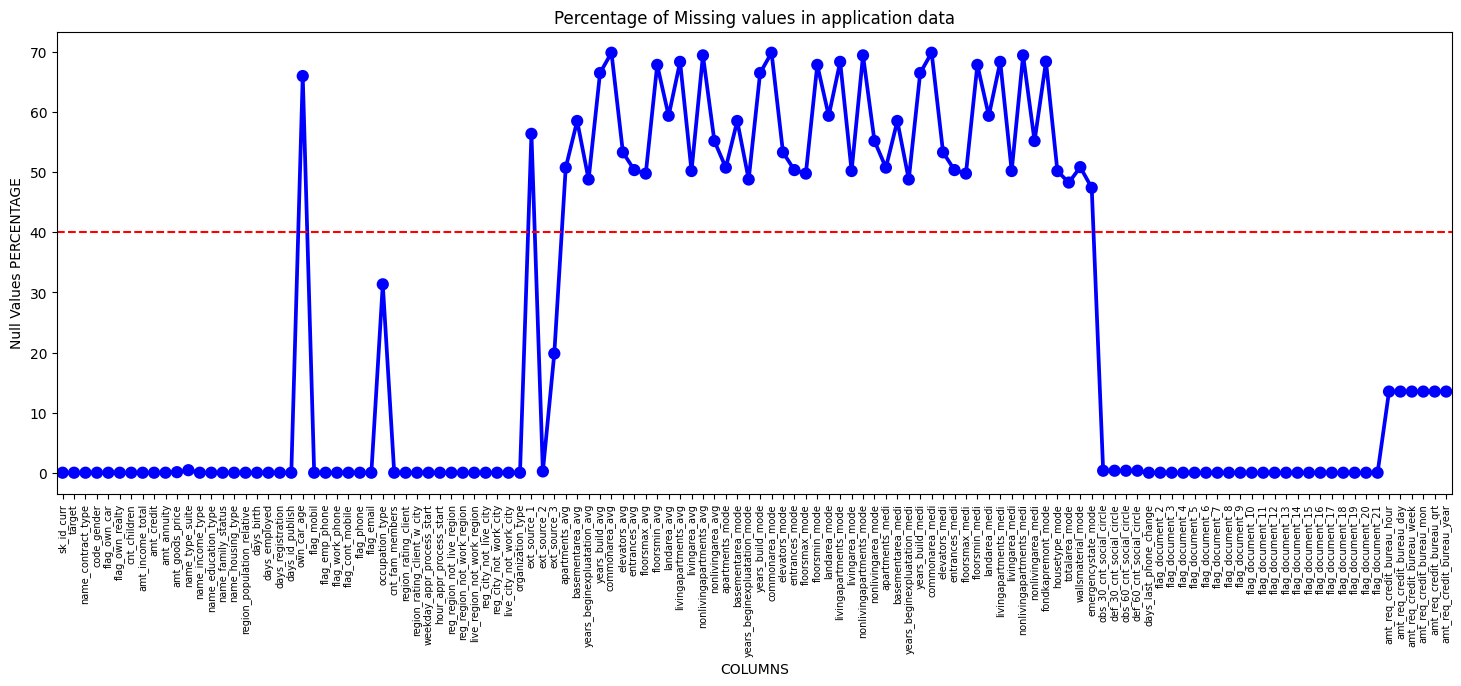

In [16]:
null_appDF = pd.DataFrame((app_data.isnull().sum())*100/app_data.shape[0]).reset_index()
null_appDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()



Removing columns with missing values more than 40%

As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.


In [17]:
## Creating a function to remove null values.
def nullremoval(dataframe_app,percent=0.40):   
    df_app = dataframe_app.copy()              
    colnames = (df_app.isnull().sum()/len(df_app))  
    colnames = list(colnames[colnames.values>=percent].index) 
    df_app.drop(labels = colnames,axis =1,inplace=True)  
    print("Total number of columns dropped: ",len(colnames))    
    return df_app

In [18]:
app_data = nullremoval(app_data,percent=0.32)

Total number of columns dropped:  49


In [19]:
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sk_id_curr                   307511 non-null  int64  
 1   target                       307511 non-null  int64  
 2   name_contract_type           307511 non-null  object 
 3   code_gender                  307511 non-null  object 
 4   flag_own_car                 307511 non-null  object 
 5   flag_own_realty              307511 non-null  object 
 6   cnt_children                 307511 non-null  int64  
 7   amt_income_total             307511 non-null  float64
 8   amt_credit                   307511 non-null  float64
 9   amt_annuity                  307499 non-null  float64
 10  amt_goods_price              307233 non-null  float64
 11  name_type_suite              306219 non-null  object 
 12  name_income_type             307511 non-null  object 
 13 

In [20]:
x  = app_data.isnull().sum()/len(app_data)*100
x[x > 0.0].sort_values()

days_last_phone_change         0.000325
cnt_fam_members                0.000650
amt_annuity                    0.003902
amt_goods_price                0.090403
ext_source_2                   0.214626
def_60_cnt_social_circle       0.332021
obs_60_cnt_social_circle       0.332021
def_30_cnt_social_circle       0.332021
obs_30_cnt_social_circle       0.332021
name_type_suite                0.420148
amt_req_credit_bureau_qrt     13.501631
amt_req_credit_bureau_hour    13.501631
amt_req_credit_bureau_day     13.501631
amt_req_credit_bureau_week    13.501631
amt_req_credit_bureau_mon     13.501631
amt_req_credit_bureau_year    13.501631
ext_source_3                  19.825307
occupation_type               31.345545
dtype: float64

There are still columns with a notably high null percentage, one may eliminate these columns based on their use or impute them with the appropriate value

amt_annuity

In [21]:
app_data['amt_annuity'].isna().sum()/len(app_data)

3.9022994299390916e-05

In [22]:
app_data['amt_annuity'].describe() 

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: amt_annuity, dtype: float64

<AxesSubplot:xlabel='amt_annuity'>

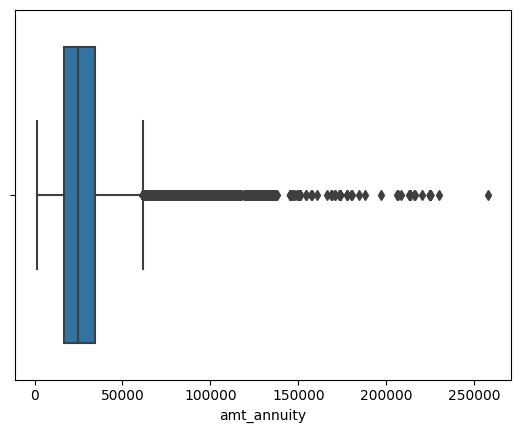

In [23]:
#Checking for any outliers using a box plot
sns.boxplot(data=app_data,x='amt_annuity')


the outliers are present in the data and the difference between max and min is significant so, impute null values with median value rather than replacing with mean, because it will consider the normal range and not consider the extreme values like the max and min values.

If we go with mean it wont be providing us with optimal replacements as it will also consider the extreme values which will make our analysis incorrect.


In [24]:
app_data['amt_annuity'].fillna(value=app_data['amt_annuity'].median(),inplace=True)
app_data['amt_annuity'].isna().sum()

0

days_last_phone_change

In [25]:
app_data['days_last_phone_change'].isna().sum()/len(app_data)

3.2519161916159095e-06

In [26]:
app_data['days_last_phone_change'].describe() 

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: days_last_phone_change, dtype: float64

<AxesSubplot:xlabel='days_last_phone_change'>

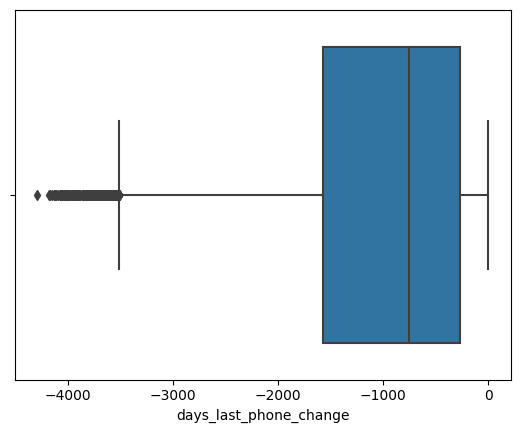

In [27]:
#Checking for any outliers using a box plot
sns.boxplot(data=app_data,x='days_last_phone_change')


In [28]:
app_data['days_last_phone_change'].fillna(value=app_data['days_last_phone_change'].median(),inplace=True)
app_data['days_last_phone_change'].isna().sum()

0

cnt_fam_members

In [29]:
app_data['cnt_fam_members'].isna().sum()/len(app_data)

6.503832383231819e-06

In [30]:
app_data['cnt_fam_members'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: cnt_fam_members, dtype: float64

<AxesSubplot:xlabel='cnt_fam_members'>

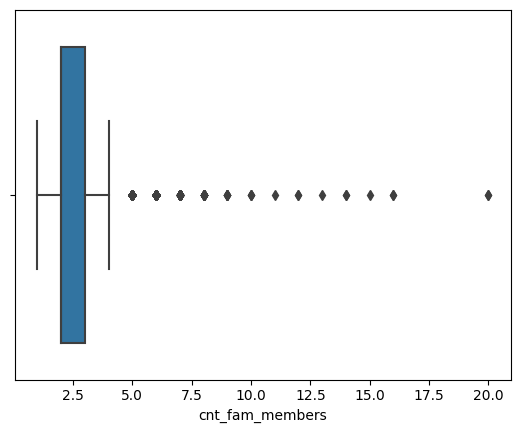

In [31]:
sns.boxplot(data=app_data,x='cnt_fam_members')


In [32]:
app_data['cnt_fam_members'].fillna(value=app_data['cnt_fam_members'].median(),inplace=True)
app_data['cnt_fam_members'].isna().sum()

0

amt_goods_price

In [33]:
app_data['amt_goods_price'].isna().sum()/len(app_data)

0.0009040327012692228

<AxesSubplot:xlabel='amt_goods_price'>

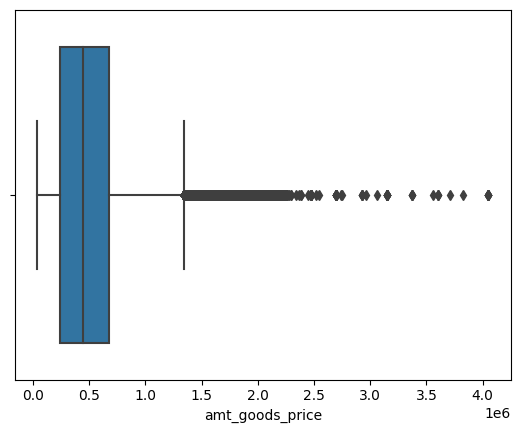

In [34]:
sns.boxplot(data=app_data,x='amt_goods_price')


99th percentile is far from our max value, shown by the outliers in our boxplot.
Outliers could be valid since they may represent the actual price of good.
We would use median to imput 

In [35]:
app_data['amt_goods_price'].fillna(value=app_data['amt_goods_price'].median(),inplace=True)
app_data['amt_goods_price'].isna().sum()

0

occupation_type

In [36]:
app_data['occupation_type'].isna().sum()/len(app_data)*100

31.345545362604916

In [37]:
app_data['occupation_type'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: occupation_type, dtype: int64

Majority of people applying for loans are 'laborers'

As a categorical variable, 'OCCUPATION_TYPE' contains around 31.3% missing values. Therefore, we may impute the missing data with the most common group, "Laborers."

In [38]:
app_data['occupation_type'] = app_data['occupation_type'].fillna(app_data['occupation_type'].value_counts().index[0])
app_data['occupation_type'].isna().sum()

0

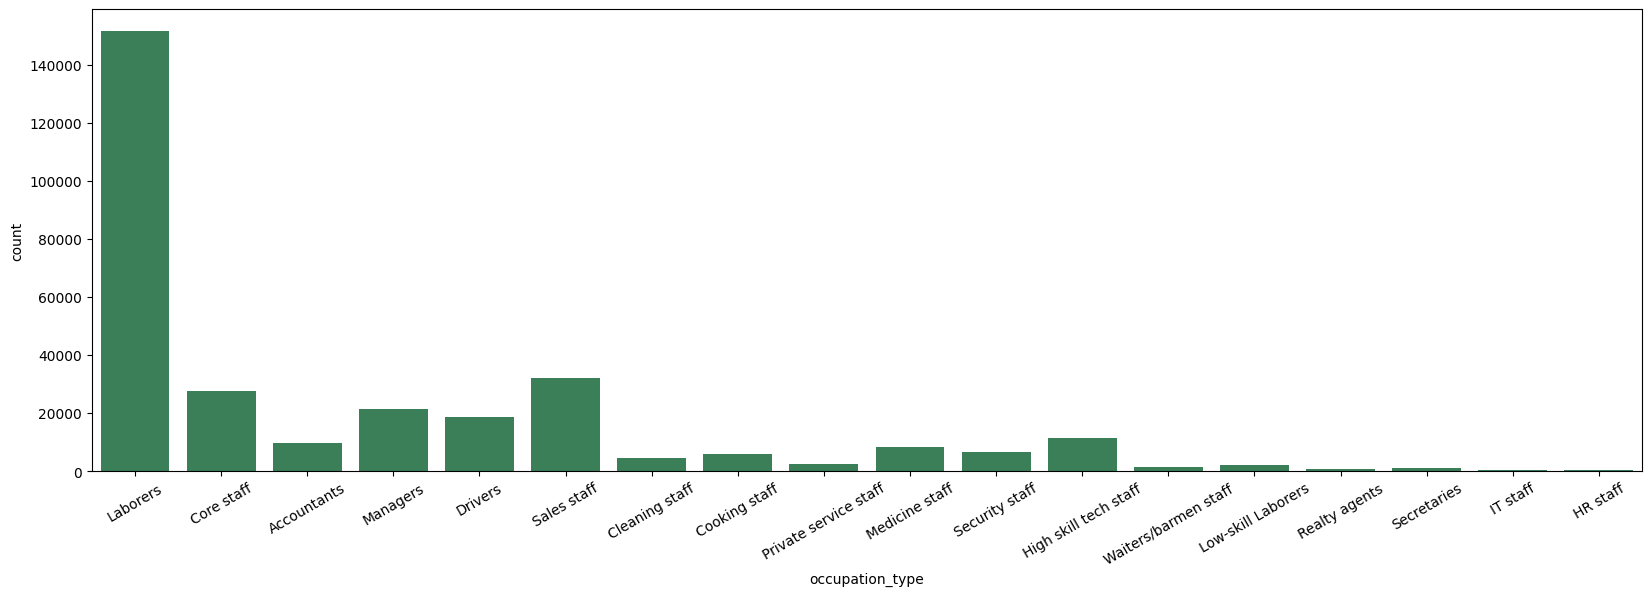

In [39]:
# Use a countplot to see the distribution of the column
plt.figure(figsize=(20,6))
ax = sns.countplot(data=app_data, x='occupation_type', color='seagreen')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

name_type_suite

In [40]:
app_data['name_type_suite'].isna().sum()/len(app_data)*100

0.42014757195677555

In [41]:
app_data.name_type_suite.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: name_type_suite, dtype: int64

The majority of NAME_TYPE_SUITS have an 'Unaccompanied' value



As a categorical variable, 'NAME TYPE SUITE' contains around 0.42% missing values. Therefore, we may impute the missing data with the most common group, "Unaccompanied."


In [42]:
app_data['name_type_suite'] = app_data['name_type_suite'].fillna(app_data['name_type_suite'].value_counts().index[0])


ext_source_2
EXT_SOURCE_2 - Normalized score from external data source, Numerical

In [43]:
app_data['ext_source_2'].isna().sum()/len(app_data)*100

0.21462646864665005

<AxesSubplot:xlabel='ext_source_2'>

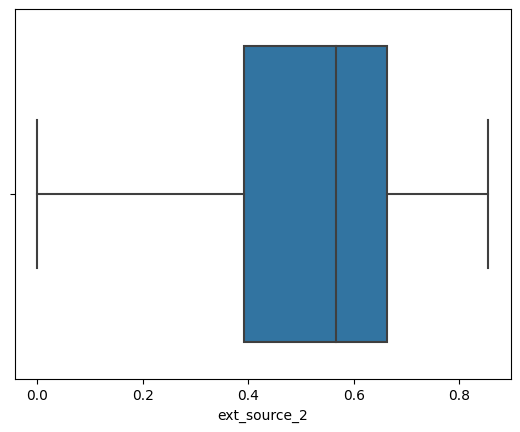

In [44]:
sns.boxplot(data=app_data,x='ext_source_2')



Because there are no outliers in the data, we may impute missing values using the mean.

    No outliers present since data has been normalized
    Will not impute as specified in case study


In [45]:
# Imputing null values with mode
app_data['ext_source_2'].fillna(value=app_data['ext_source_2'].mean(),inplace=True)
app_data['ext_source_2'].isna().sum()

0

ext_source_3
 Normalized score from external data source, Numerical

In [46]:
app_data['ext_source_3'].isna().sum()/len(app_data)*100

19.825307062186393

In [47]:
app_data['ext_source_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: ext_source_3, dtype: float64

<AxesSubplot:xlabel='ext_source_3'>

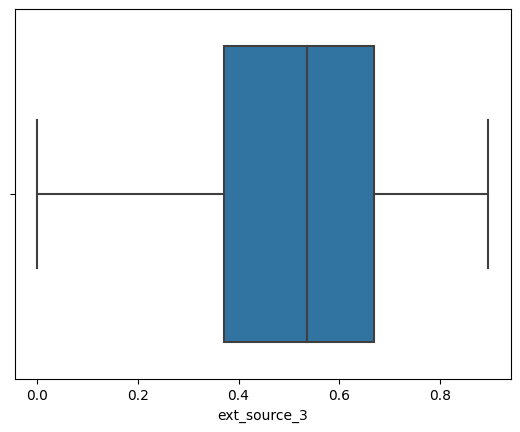

In [48]:
sns.boxplot(data=app_data,x='ext_source_3')


    No outliers due to normalization.
    We will drop column due to high number of missing values.
    We will use EXT_SOURCE_2 instead.


In [49]:
app_data = app_data.drop(columns='ext_source_3')

 4.2.9 Number of Inqueries to Credit Bureau Imputation 

These columns show the number of inqueries made to a credit bureau:

   -AMT_REQ_CREDIT_BUREAU_YEAR
   
   -AMT_REQ_CREDIT_BUREAU_QRT
   
   -AMT_REQ_CREDIT_BUREAU_MON
   
   -AMT_REQ_CREDIT_BUREAU_WEEK
   
   -AMT_REQ_CREDIT_BUREAU_DAY
   
   -AMT_REQ_CREDIT_BUREAU_HOUR  


    Missing % of values in all these columns is 13.5
    Null values suggest applicant has not gotten a loan


In [50]:
app_data[['amt_req_credit_bureau_year','amt_req_credit_bureau_qrt','amt_req_credit_bureau_mon','amt_req_credit_bureau_week','amt_req_credit_bureau_day','amt_req_credit_bureau_hour']].describe()

,amt_req_credit_bureau_year,amt_req_credit_bureau_qrt,amt_req_credit_bureau_mon,amt_req_credit_bureau_week,amt_req_credit_bureau_day,amt_req_credit_bureau_hour
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.265474,0.267395,0.034362,0.007000,0.006402
std,1.869295,0.794056,0.916002,0.204685,0.110757,0.083849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,261.000000,27.000000,8.000000,9.000000,4.000000


In [51]:
app_data[['amt_req_credit_bureau_year','amt_req_credit_bureau_qrt','amt_req_credit_bureau_mon','amt_req_credit_bureau_week','amt_req_credit_bureau_day','amt_req_credit_bureau_hour']].mode()

,amt_req_credit_bureau_year,amt_req_credit_bureau_qrt,amt_req_credit_bureau_mon,amt_req_credit_bureau_week,amt_req_credit_bureau_day,amt_req_credit_bureau_hour
0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
amt_credit_lst = ['amt_req_credit_bureau_year','amt_req_credit_bureau_qrt','amt_req_credit_bureau_mon','amt_req_credit_bureau_week','amt_req_credit_bureau_day','amt_req_credit_bureau_hour']

for col in amt_credit_lst:
    app_data[col].fillna(app_data[col].median(),inplace = True)

obs_30_cnt_social_circle

In [53]:
app_data['obs_30_cnt_social_circle'].isna().sum()/len(app_data)*100

0.3320206431639844

In [54]:
app_data['obs_30_cnt_social_circle'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: obs_30_cnt_social_circle, dtype: float64

<AxesSubplot:xlabel='obs_30_cnt_social_circle'>

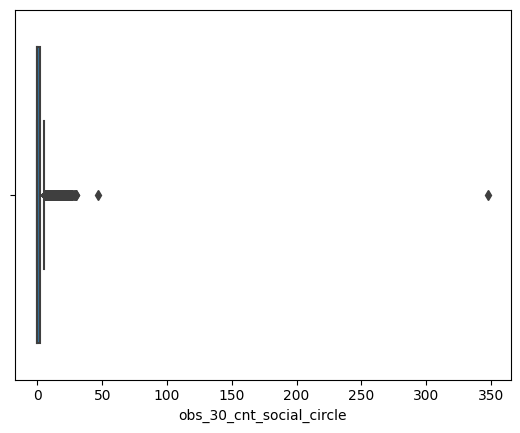

In [55]:
sns.boxplot(data=app_data,x='obs_30_cnt_social_circle')

We can impute values with median since mean, median are close to eachother and we do not have many missing percent values.

In [56]:
    #impute using the median
app_data['obs_30_cnt_social_circle'].fillna(value=app_data['obs_30_cnt_social_circle'].median(), inplace=True)

In [57]:
app_data.obs_30_cnt_social_circle.median()

0.0

<AxesSubplot:xlabel='def_30_cnt_social_circle'>

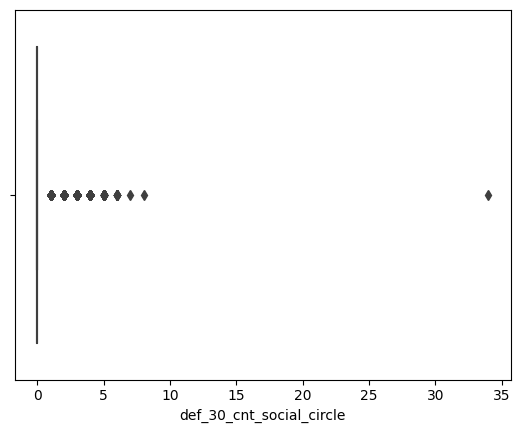

In [58]:
sns.boxplot(data=app_data,x='def_30_cnt_social_circle')

In [59]:
app_data['def_30_cnt_social_circle'].fillna(value=app_data['def_30_cnt_social_circle'].median(), inplace=True)

<AxesSubplot:xlabel='obs_60_cnt_social_circle'>

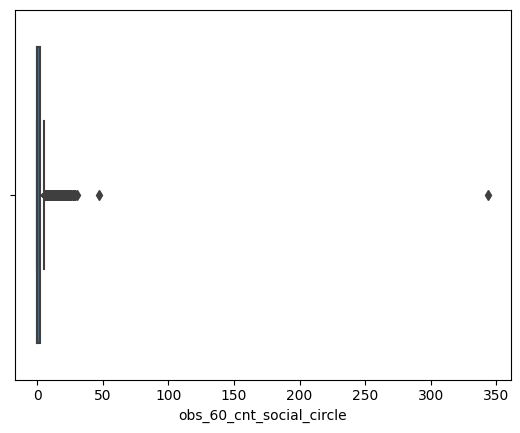

In [60]:
sns.boxplot(data=app_data,x='obs_60_cnt_social_circle')

In [61]:
app_data['obs_60_cnt_social_circle'].fillna(value=app_data['obs_60_cnt_social_circle'].median(), inplace=True)

<AxesSubplot:xlabel='def_60_cnt_social_circle'>

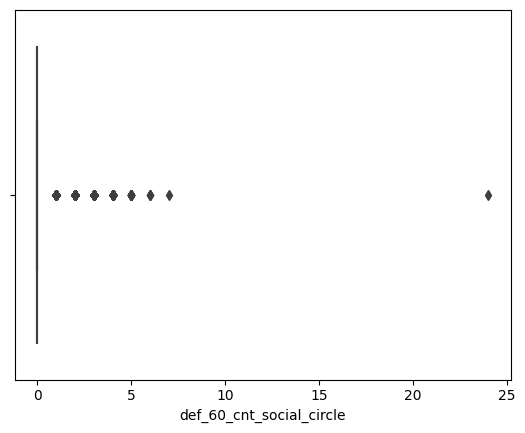

In [62]:
sns.boxplot(data=app_data,x='def_60_cnt_social_circle')

In [63]:
app_data['def_60_cnt_social_circle'].fillna(value=app_data['def_60_cnt_social_circle'].median(), inplace=True)

In [64]:
round(app_data.isna().sum()/len(app_data)*100,2).sort_values(ascending=False)

sk_id_curr                     0.0
target                         0.0
flag_document_8                0.0
flag_document_7                0.0
flag_document_6                0.0
flag_document_5                0.0
flag_document_4                0.0
flag_document_3                0.0
flag_document_2                0.0
days_last_phone_change         0.0
def_60_cnt_social_circle       0.0
obs_60_cnt_social_circle       0.0
def_30_cnt_social_circle       0.0
obs_30_cnt_social_circle       0.0
ext_source_2                   0.0
organization_type              0.0
live_city_not_work_city        0.0
flag_document_9                0.0
flag_document_10               0.0
flag_document_11               0.0
flag_document_20               0.0
amt_req_credit_bureau_qrt      0.0
amt_req_credit_bureau_mon      0.0
amt_req_credit_bureau_week     0.0
amt_req_credit_bureau_day      0.0
amt_req_credit_bureau_hour     0.0
flag_document_21               0.0
flag_document_19               0.0
flag_document_12    

###  Inspecting Incorrect/Unknown Values

We can reduce incorrect values for some columns

code_gender

In [65]:
app_data['code_gender'].value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [66]:
app_data[app_data['code_gender'] == 'XNA']

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,Laborers,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,Laborers,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


Female applicants are almost twice that of male applicants.
 XNA may be clients who did not wish to specify gender.


In [67]:
# Impute value with female since is mode and it will not introduce bias in our data
app_data['code_gender']= app_data['code_gender'].apply(lambda x: 'F' if x == 'XNA' else x)
app_data['code_gender'].value_counts()

F    202452
M    105059
Name: code_gender, dtype: int64

name_family_status - Family status of client, Categorical

In [68]:
app_data['name_family_status'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: name_family_status, dtype: int64

In [69]:
# Impute Unknown with married
app_data['name_family_status'] = app_data['name_family_status'].apply(lambda x: 'Married' if x == 'Unknown' else x)
app_data['name_family_status'].value_counts()


Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: name_family_status, dtype: int64

In [70]:
#pp_data['organization_type'].value_counts()

In [71]:
#app_data.select_dtypes(include='object').columns.to_list()

 Analyze & Delete Unnecessary Columns in app_df

# Features Selection

In [72]:
app_data.columns.to_list()

['sk_id_curr',
 'target',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'flag_mobil',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_2',
 'obs_30_cnt_social_circle',
 'def_30_cnt_social_circle',
 'obs_60_cnt_social_circle',
 'def_60_cnt_social_circle',
 

In [73]:
flag_docs = ['flag_document_2', 'flag_document_3', 'flag_document_4', 'flag_document_5',
 'flag_document_6', 'flag_document_7', 'flag_document_8', 'flag_document_9', 'flag_document_10',
 'flag_document_11', 'flag_document_12', 'flag_document_13', 'flag_document_14',
 'flag_document_15','flag_document_16','flag_document_17','flag_document_18',
 'flag_document_19','flag_document_20','flag_document_21']

In [74]:
df_flag = app_data[flag_docs+["target"]]

In [75]:
df_flag["target"] = df_flag["target"].replace({1:"Defaulter",0:"Repayer"})

In [76]:
import itertools

In [77]:
length = len(flag_docs)

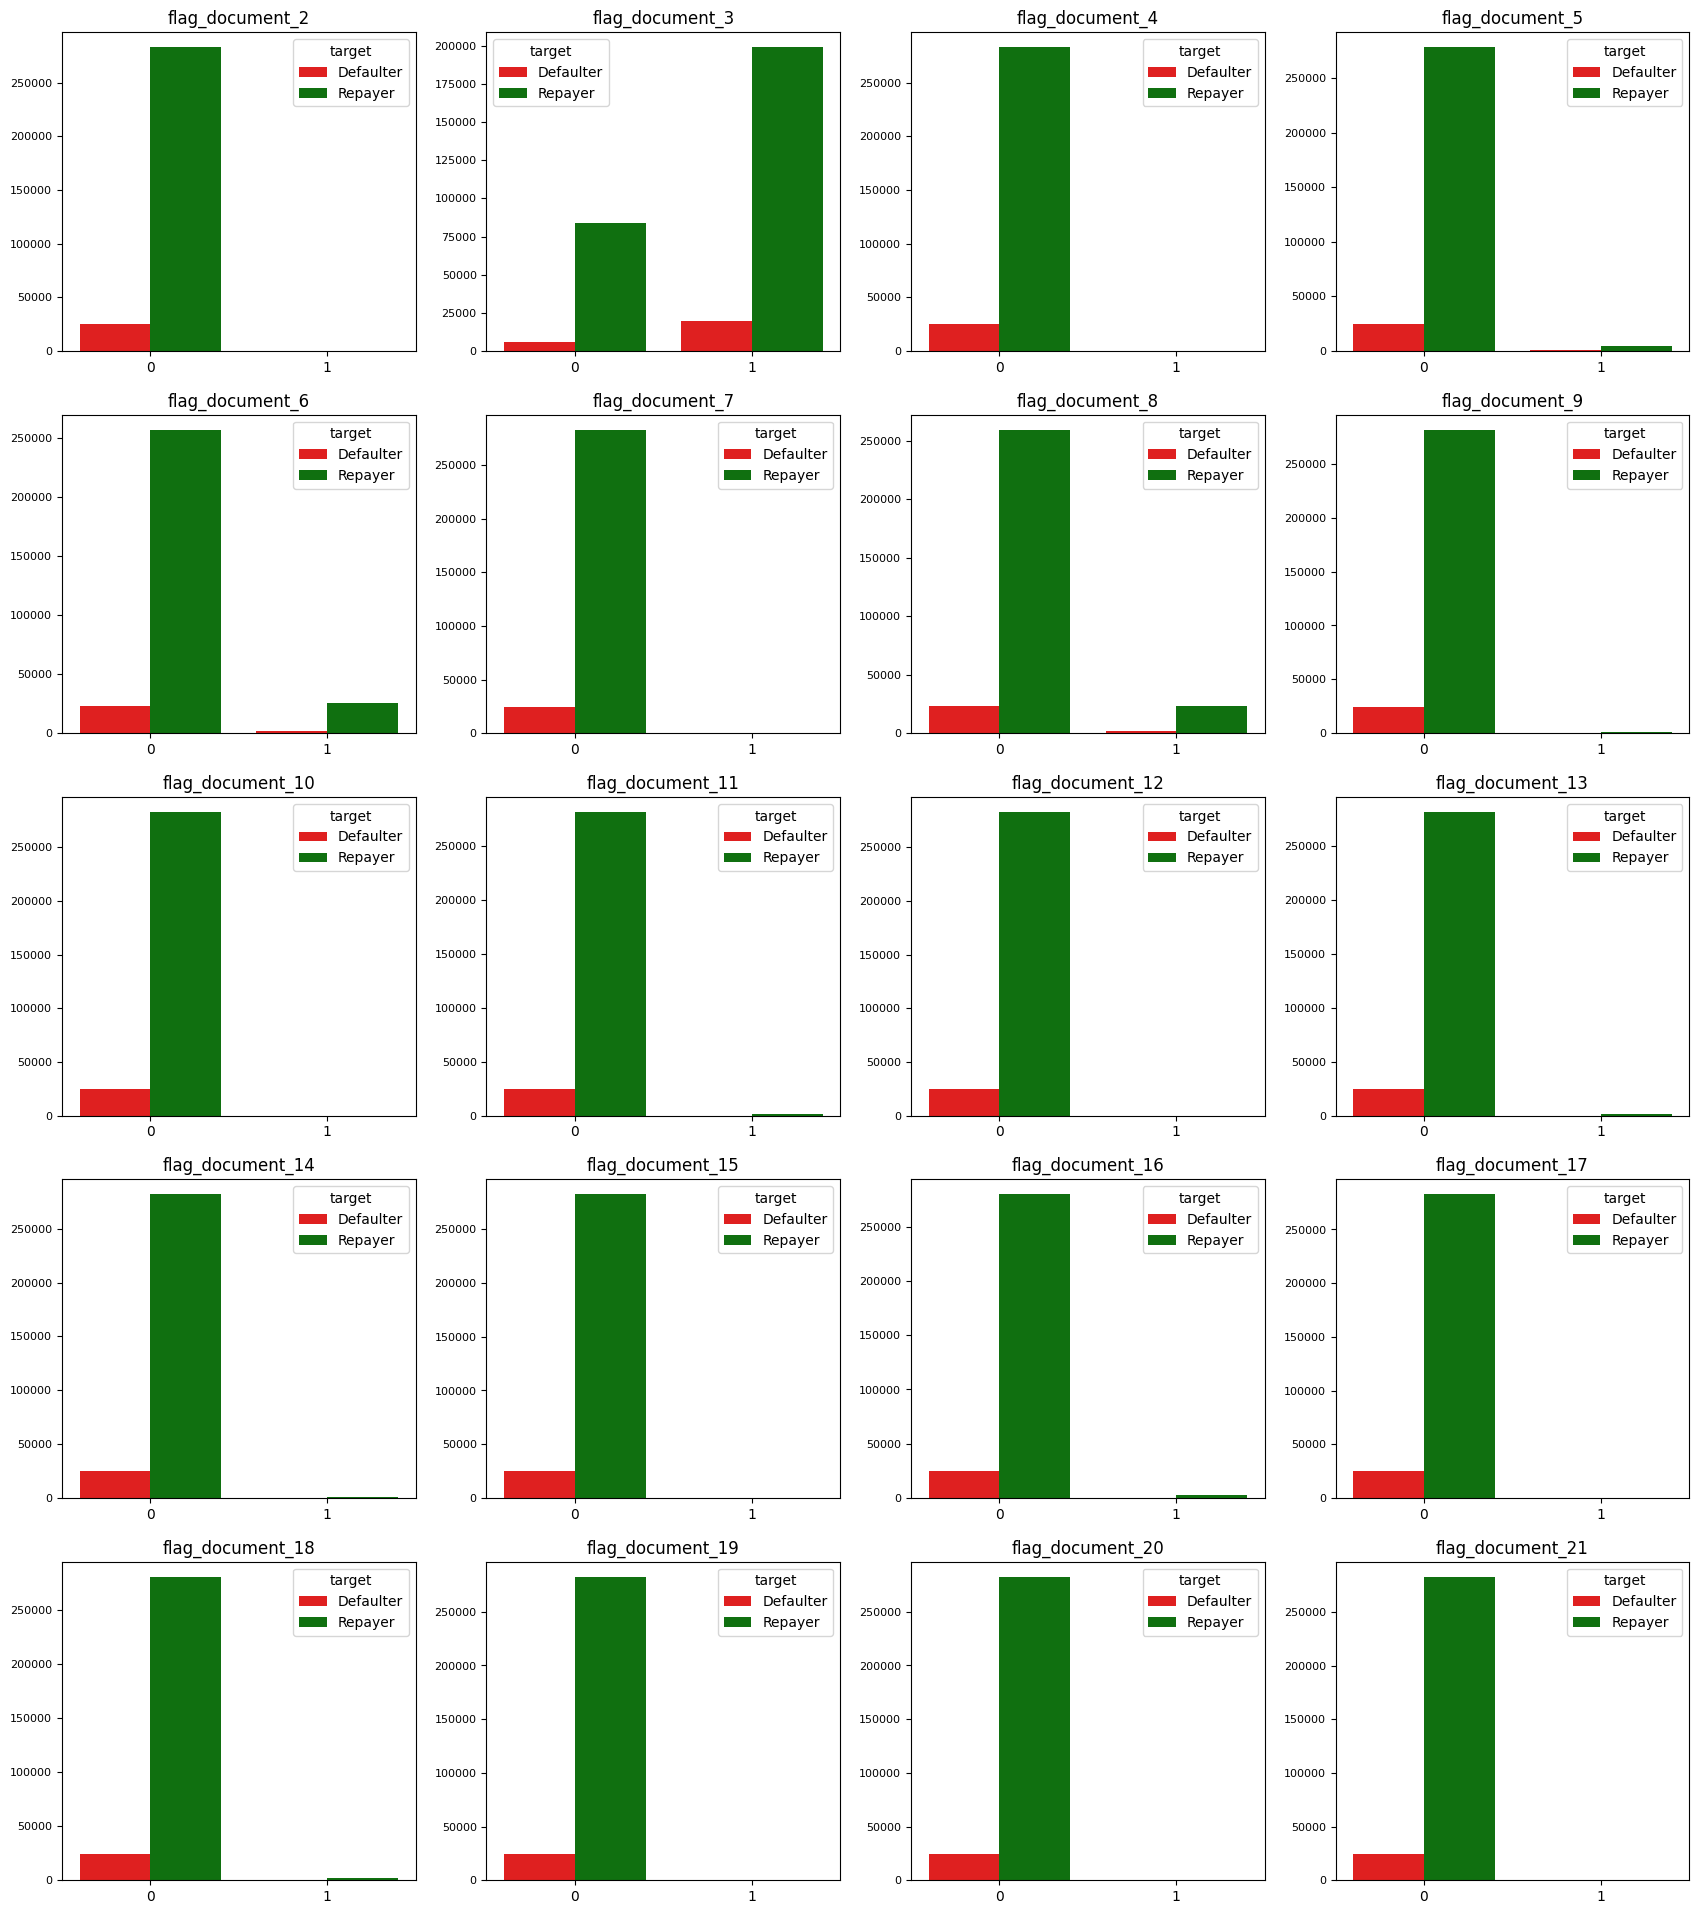

In [78]:
fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_docs,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(x = df_flag[i],hue=df_flag["target"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

nsight: The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns.

In [79]:
app_data =app_data.drop(columns = ['flag_document_2','flag_document_4', 'flag_document_5',
 'flag_document_6', 'flag_document_7', 'flag_document_8', 'flag_document_9', 'flag_document_10',
 'flag_document_11', 'flag_document_12', 'flag_document_13', 'flag_document_14',
 'flag_document_15','flag_document_16','flag_document_17','flag_document_18',
 'flag_document_19','flag_document_20','flag_document_21'])

smt credits

In [80]:
amt_credit_cols = app_data[['amt_req_credit_bureau_hour','amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon','amt_req_credit_bureau_qrt','amt_req_credit_bureau_year','target']]


 checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating

In [81]:
#Source = app_data[['amt_req_credit_bureau_hour','amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
# 'amt_req_credit_bureau_mon','amt_req_credit_bureau_qrt','amt_req_credit_bureau_year',"target"]]
#corr=pd.DataFrame((Source.apply(lambda x : pd.factorize(x)[0]).corr()))
#corr

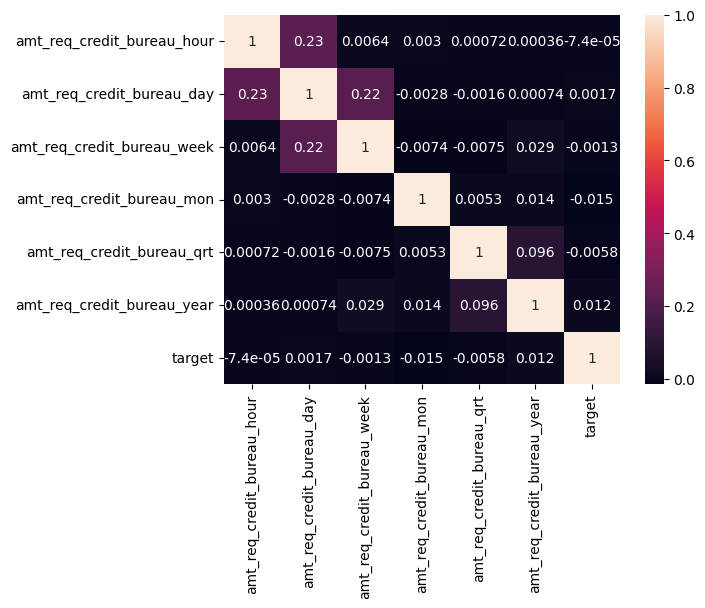

In [82]:

# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source =amt_credit_cols
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            )

In [83]:
app_data =app_data.drop(columns = ['amt_req_credit_bureau_hour','amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
 'amt_req_credit_bureau_mon','amt_req_credit_bureau_qrt','amt_req_credit_bureau_year'])

social_circle_cols

In [84]:
social_circle_cols = app_data[['obs_30_cnt_social_circle','def_30_cnt_social_circle','obs_60_cnt_social_circle','def_60_cnt_social_circle','target']]


 checking is there is any correlation between social_circle_cols and target

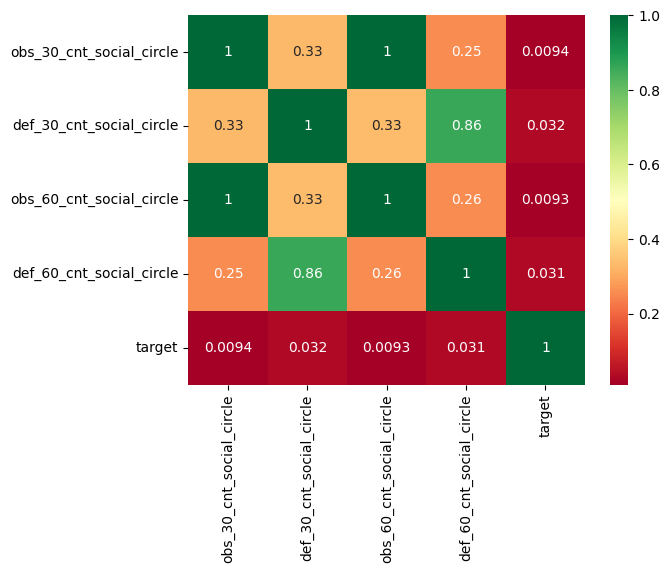

In [85]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = social_circle_cols
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [86]:
app_data =app_data.drop(columns = ['obs_30_cnt_social_circle','def_30_cnt_social_circle','obs_60_cnt_social_circle','def_60_cnt_social_circle'])

flag_contacts

In [87]:
flag_contacts = app_data[['flag_mobil','flag_emp_phone','flag_work_phone','flag_cont_mobile','flag_phone','flag_email','target']]


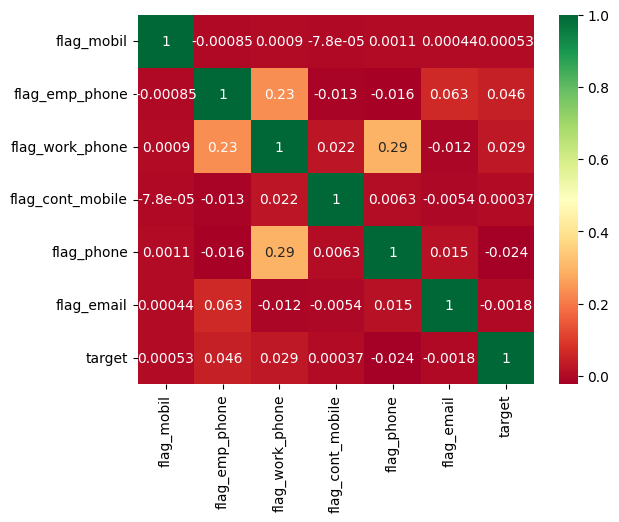

In [88]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = flag_contacts
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [89]:
app_data =app_data.drop(columns = ['flag_mobil','flag_emp_phone','flag_work_phone','flag_cont_mobile','flag_phone','flag_email'])

In [90]:
app_data.shape

(307511, 37)

In [91]:
app_data.columns.to_list()

['sk_id_curr',
 'target',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_2',
 'days_last_phone_change',
 'flag_document_3']

In [92]:
regions = app_data[['region_rating_client',
 'region_rating_client_w_city','reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'region_population_relative','target']]

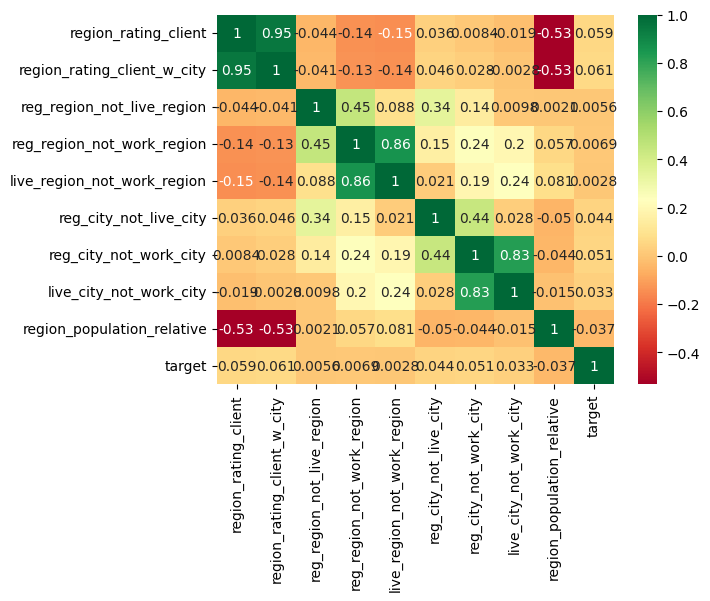

In [93]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = regions
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [94]:
#dates_cols = app_data[['days_birth','days_employed','days_registration','days_id_publish']]


###  Standardize Values


Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative. 
Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns Categorize the amount variables into bins Convert region rating column and few other columns to categorical

In [95]:
app_data.columns.to_list()

['sk_id_curr',
 'target',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_2',
 'days_last_phone_change',
 'flag_document_3']

In [96]:
# Converting Negative days to positive days

date_cols = ['days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',]

for col in date_cols:
    app_data[col] = abs(app_data[col])

In [97]:
app_data.name_family_status.value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: name_family_status, dtype: int64

# Features Engineering

In [98]:
app_data['amt_income_total'].isna().sum()

0

In [99]:
# Binning Numerical Columns to create a categorical column

# Creating bins for inco
app_data['amt_income_total_2']=app_data['amt_income_total']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['amt_income_total']=pd.cut(app_data['amt_income_total_2'],bins,labels=slot)

In [100]:
app_data['amt_income_total'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: amt_income_total, dtype: float64

Insight: More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [101]:
app_data['amt_income_total'] = app_data['amt_income_total'].fillna(app_data['amt_income_total'].value_counts().index[0])


In [102]:
# Creating bins for Credit amount
app_data['amt_credit']=app_data['amt_credit']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_data['amt_credit']=pd.cut(app_data['amt_credit'],bins=bins,labels=slots)

In [103]:
app_data['amt_credit'].isna().sum()

0

In [104]:
app_data['amt_credit'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: amt_credit, dtype: float64



Insight: More Than 16% loan applicants have taken loan which amounts to more than 1M.


In [105]:
# Creating bins for Age
app_data['age'] = app_data['days_birth'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

app_data['age_grp']=pd.cut(app_data['age'],bins=bins,labels=slots)

In [106]:
#checking the binning of data and % of data in each category
app_data['age_grp'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: age_grp, dtype: float64



31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.


In [107]:
#app_data['emp_year'].isna().sum()

In [108]:
# Creating bins for Employement Time
app_data['years_employed'] = app_data['days_employed'] // 365
bins = [0,5,10,20,30,40,50,60,100,1000]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60-100','100-1000']

app_data['emp_year']=pd.cut(app_data['years_employed'],bins=bins,labels=slots)


In [109]:
#checking the binning of data and % of data in each category
app_data['emp_year'].value_counts(normalize=True)*100


0-5         44.574707
5-10        20.022031
100-1000    19.804225
10-20       11.679965
20-30        3.007435
30-40        0.849049
40-50        0.062588
50-60        0.000000
60-100       0.000000
Name: emp_year, dtype: float64

In [110]:
app_data['emp_year'] = app_data['emp_year'].fillna(app_data['emp_year'].value_counts().index[0])




Insight: More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience


In [111]:
app_data.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,days_last_phone_change,flag_document_3,amt_income_total_2,age,age_grp,years_employed,emp_year
168561,295386,0,Cash loans,F,N,Y,0,200k-300k,400k-500k,34371.0,481500.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.026392,21476,365243,5138.0,4206,Laborers,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,XNA,0.472575,-2135.0,1,2.025,58,50 above,1000,100-1000


In [112]:
# Convert negative values into positive using lambda function
app_data['days_last_phone_change'] = app_data['days_last_phone_change'].apply(lambda x: abs(x) if x < 0 else x)
app_data['days_last_phone_change'].describe()

count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: days_last_phone_change, dtype: float64

count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: years_last_phone_change, dtype: float64


<AxesSubplot:xlabel='years_last_phone_change'>

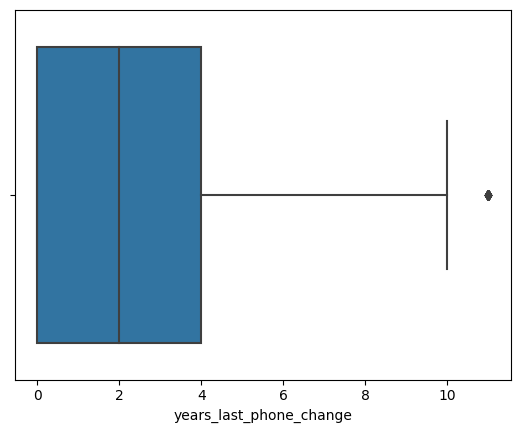

In [113]:


# Create a YEARS_LAST_PHONE_CHANGE column
app_data['years_last_phone_change'] = app_data['days_last_phone_change'].apply(lambda x: (x // 365))
print(app_data['years_last_phone_change'].describe())
sns.boxplot(data=app_data, x='years_last_phone_change')



app_data

In [114]:
app_data.columns.to_list()

['sk_id_curr',
 'target',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_2',
 'days_last_phone_change',
 'flag_document_3',
 'amt_income_total_2',
 'age',
 'age_grp',
 'years_employed',
 'emp_year',
 'years_last_phone_change']

In [115]:
app_data.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,days_last_phone_change,flag_document_3,amt_income_total_2,age,age_grp,years_employed,emp_year,years_last_phone_change
149099,272865,0,Cash loans,F,N,Y,0,100K-200K,500k-600k,16047.0,454500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.00702,18562,2216,998.0,2122,Sales staff,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Self-employed,0.647083,1614.0,1,1.125,50,40-50,6,5-10,4.0


In [119]:
 """final_app_df = app_df_corr[final_selected_app_cols]
final_app_df['target'] = app_data['target']
final_app_df['sk_id_curr'] = app_data['sk_id_curr']
final_app_df.sample()"""

"final_app_df = app_df_corr[final_selected_app_cols]\nfinal_app_df['target'] = app_data['target']\nfinal_app_df['sk_id_curr'] = app_data['sk_id_curr']\nfinal_app_df.sample()"

In [120]:
#final_app_df.columns.to_list()

# Previouse Data

In [121]:
prev_app_data = pd.read_csv('previous_application.csv')
prev_app_data.columns = prev_app_data.columns.str.lower()

In [122]:
prev_app_data.shape

(1670214, 37)

In [123]:
prev_app_data.drop_duplicates().shape

(1670214, 37)

check nans

In [124]:
round(100*(prev_app_data.isnull().sum()/len(prev_app_data.index)),2).sort_values(ascending=False)

rate_interest_privileged       99.64
rate_interest_primary          99.64
rate_down_payment              53.64
amt_down_payment               53.64
name_type_suite                49.12
nflag_insured_on_approval      40.30
days_first_drawing             40.30
days_first_due                 40.30
days_last_due_1st_version      40.30
days_last_due                  40.30
days_termination               40.30
amt_goods_price                23.08
amt_annuity                    22.29
cnt_payment                    22.29
product_combination             0.02
channel_type                    0.00
name_product_type               0.00
name_yield_group                0.00
sellerplace_area                0.00
name_seller_industry            0.00
name_goods_category             0.00
name_portfolio                  0.00
sk_id_prev                      0.00
name_client_type                0.00
code_reject_reason              0.00
sk_id_curr                      0.00
days_decision                   0.00
n

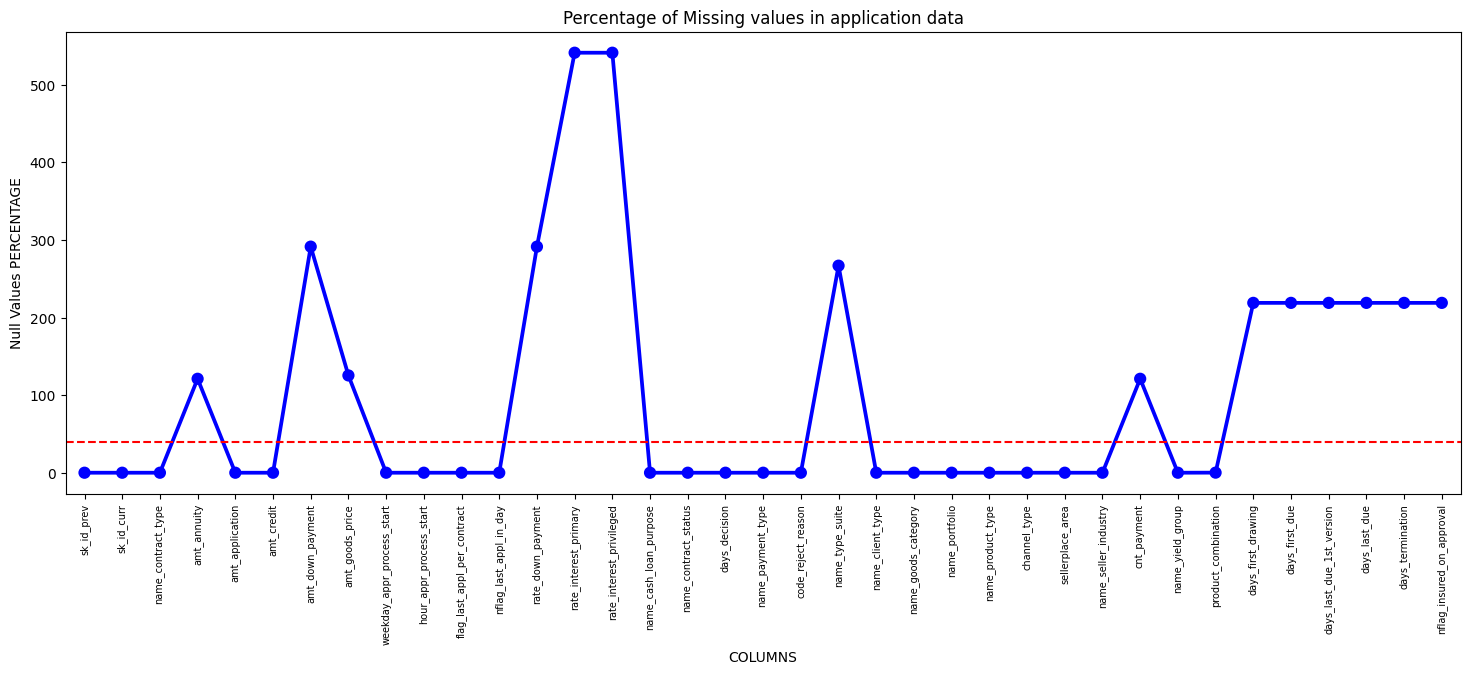

In [125]:
null_appDF = pd.DataFrame((prev_app_data.isnull().sum())*100/app_data.shape[0]).reset_index()
null_appDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()



Removing columns with missing values more than 50%
key point

As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector

In [126]:
#prev_app_data=prev_app_data.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
#       "RATE_INTEREST_PRIVILEGED"],axis=1)

In [127]:
round(100*(prev_app_data.isnull().sum()/len(prev_app_data.index)),2).sort_values(ascending=False)


rate_interest_privileged       99.64
rate_interest_primary          99.64
rate_down_payment              53.64
amt_down_payment               53.64
name_type_suite                49.12
nflag_insured_on_approval      40.30
days_first_drawing             40.30
days_first_due                 40.30
days_last_due_1st_version      40.30
days_last_due                  40.30
days_termination               40.30
amt_goods_price                23.08
amt_annuity                    22.29
cnt_payment                    22.29
product_combination             0.02
channel_type                    0.00
name_product_type               0.00
name_yield_group                0.00
sellerplace_area                0.00
name_seller_industry            0.00
name_goods_category             0.00
name_portfolio                  0.00
sk_id_prev                      0.00
name_client_type                0.00
code_reject_reason              0.00
sk_id_curr                      0.00
days_decision                   0.00
n

In [128]:
## Creating a function to remove null values.
def nullremoval(dataframe_app,percent=0.50):   
    df_app = dataframe_app.copy()              
    colnames = (df_app.isnull().sum()/len(df_app))  
    colnames = list(colnames[colnames.values>=percent].index) 
    df_app.drop(labels = colnames,axis =1,inplace=True)  
    print("Total number of columns dropped: ",len(colnames))    
    return df_app

In [129]:
prev_app_data = nullremoval(prev_app_data,percent=0.40)

Total number of columns dropped:  11


In [130]:
prev_app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_goods_price              1284699 non-null  float64
 7   weekday_appr_process_start   1670214 non-null  object 
 8   hour_appr_process_start      1670214 non-null  int64  
 9   flag_last_appl_per_contract  1670214 non-null  object 
 10  nflag_last_appl_in_day       1670214 non-null  int64  
 11  name_cash_loan_purpose       1670214 non-null  object 
 12  name_contract_status         1670214 non-n

In [131]:
x  = prev_app_data.isnull().sum()/len(prev_app_data)*100
x[x > 0.0].sort_values()

amt_credit              0.000060
product_combination     0.020716
cnt_payment            22.286366
amt_annuity            22.286665
amt_goods_price        23.081773
dtype: float64

There are still columns with a notably high null percentage, one may eliminate these columns based on their use or impute them with the appropriate value

AMT_CREDIT

In [132]:
prev_app_data['amt_credit'].isna().sum()/len(app_data)

3.2519161916159095e-06

In [133]:
prev_app_data['amt_credit'].describe() 

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: amt_credit, dtype: float64

<AxesSubplot:xlabel='amt_credit'>

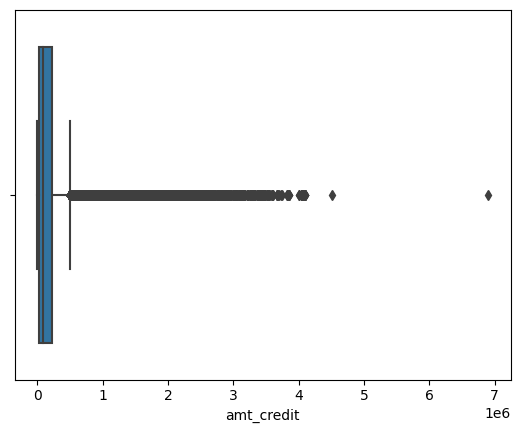

In [134]:
#Checking for any outliers using a box plot
sns.boxplot(data=prev_app_data,x='amt_credit')


In [135]:
prev_app_data['amt_credit'].fillna(value=prev_app_data['amt_credit'].median(),inplace=True)
prev_app_data['amt_credit'].isna().sum()

0

product_combination

In [136]:
prev_app_data['product_combination'].isna().sum()/len(app_data)

0.0011251630022991047

In [137]:
prev_app_data['product_combination'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: product_combination, dtype: int64

In [138]:
prev_app_data['product_combination'] = prev_app_data['product_combination'].fillna(prev_app_data['product_combination'].value_counts().index[0])
prev_app_data['product_combination'].isna().sum()

0

cnt_payment

In [139]:
prev_app_data['cnt_payment'].isna().sum()/len(app_data)

1.21046076400519

In [140]:
prev_app_data['cnt_payment'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: cnt_payment, dtype: float64

<AxesSubplot:xlabel='cnt_payment'>

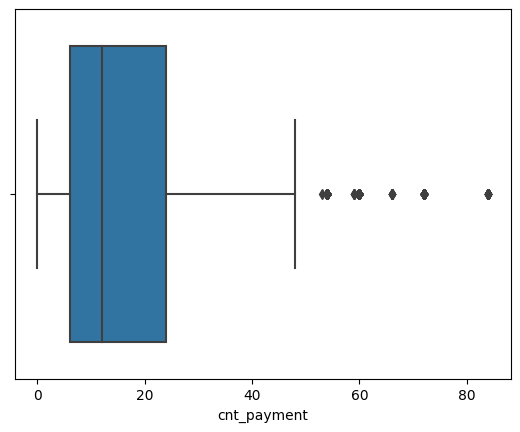

In [141]:
#Checking for any outliers using a box plot
sns.boxplot(data=prev_app_data,x='cnt_payment')


In [142]:
prev_app_data['cnt_payment'].fillna(value=prev_app_data['cnt_payment'].median(),inplace=True)
prev_app_data['cnt_payment'].isna().sum()

0

amt_annuity

In [143]:
prev_app_data['amt_annuity'].isna().sum()/len(app_data)

1.2104770235861482

In [144]:
prev_app_data['amt_annuity'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: amt_annuity, dtype: float64

<AxesSubplot:xlabel='amt_annuity'>

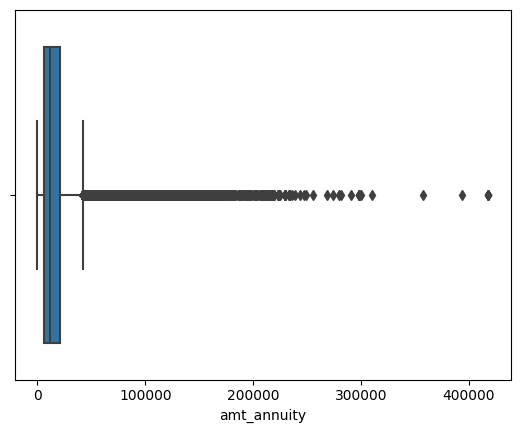

In [145]:
#Checking for any outliers using a box plot
sns.boxplot(data=prev_app_data,x='amt_annuity')


In [146]:
prev_app_data['amt_annuity'].fillna(value=prev_app_data['amt_annuity'].median(),inplace=True)
prev_app_data['amt_annuity'].isna().sum()

0

amt_goods_price

In [147]:
prev_app_data['amt_goods_price'].isna().sum()/len(app_data)

1.2536624706108075

In [148]:
prev_app_data['amt_goods_price'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: amt_goods_price, dtype: float64

<AxesSubplot:xlabel='amt_goods_price'>

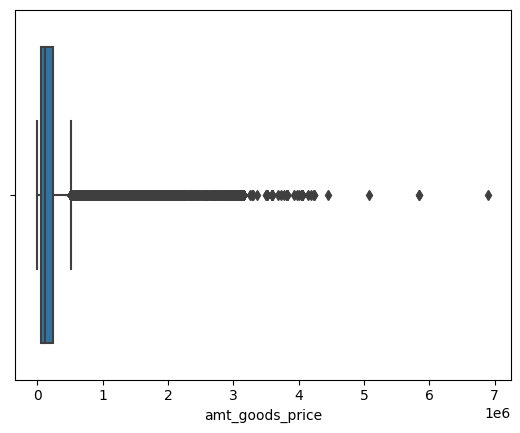

In [149]:
#Checking for any outliers using a box plot
sns.boxplot(data=prev_app_data,x='amt_goods_price')


In [150]:
prev_app_data['amt_goods_price'].fillna(value=prev_app_data['amt_goods_price'].median(),inplace=True)
prev_app_data['amt_goods_price'].isna().sum()

0

In [151]:
    round(100*(prev_app_data.isnull().sum()/len(prev_app_data.index)),2).sort_values(ascending=False)

sk_id_prev                     0.0
sk_id_curr                     0.0
name_yield_group               0.0
cnt_payment                    0.0
name_seller_industry           0.0
sellerplace_area               0.0
channel_type                   0.0
name_product_type              0.0
name_portfolio                 0.0
name_goods_category            0.0
name_client_type               0.0
code_reject_reason             0.0
name_payment_type              0.0
days_decision                  0.0
name_contract_status           0.0
name_cash_loan_purpose         0.0
nflag_last_appl_in_day         0.0
flag_last_appl_per_contract    0.0
hour_appr_process_start        0.0
weekday_appr_process_start     0.0
amt_goods_price                0.0
amt_credit                     0.0
amt_application                0.0
amt_annuity                    0.0
name_contract_type             0.0
product_combination            0.0
dtype: float64

In [152]:
prev_app_data.days_decision.unique()

array([  -73,  -164,  -301, ..., -1967, -2389,    -1])

In [153]:
#Converting negative days to positive days 
prev_app_data['days_decision'] = abs(prev_app_data['days_decision'])

In [154]:
#age group calculation e.g. 388 will be grouped as 300-400
prev_app_data['days_decision'] = (prev_app_data['days_decision']-(prev_app_data['days_decision'] % 400)).astype(str)+'-'+ ((prev_app_data['days_decision'] - (prev_app_data['days_decision'] % 400)) + (prev_app_data['days_decision'] % 400) + (400 - (prev_app_data['days_decision'] % 400))).astype(str)

In [155]:
prev_app_data['days_decision'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: days_decision, dtype: float64

In [163]:
application_data_x = app_data[[x for x in app_data.columns if x not in ["target"]]]
previous_application_x = prev_app_data[[x for x in prev_app_data.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 



### Data Vizualization

### Distribution of Target variable




TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)


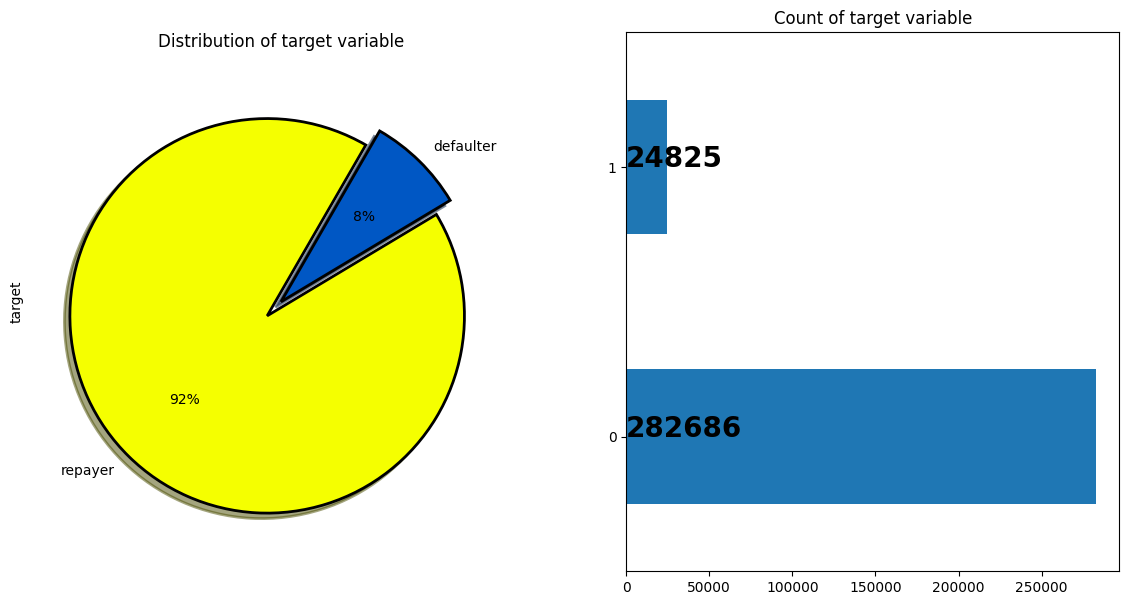

In [159]:


plt.figure(figsize=(14,7))
plt.subplot(121)
app_data["target"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = app_data["target"].value_counts().plot(kind="barh")

for i,j in enumerate(app_data["target"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()



8% out of total client population have difficulties in repaying loans.

Analysis of App data

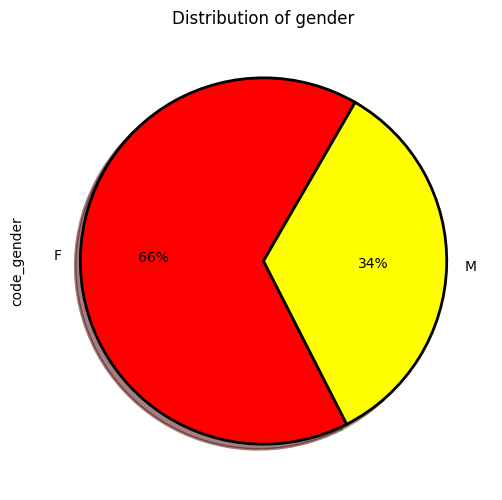

In [161]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
app_data["code_gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.title("Distribution of gender")
plt.show()


Distribution of client owning a car and by gender

FLAG_OWN_CAR Flag if the client owns a car .


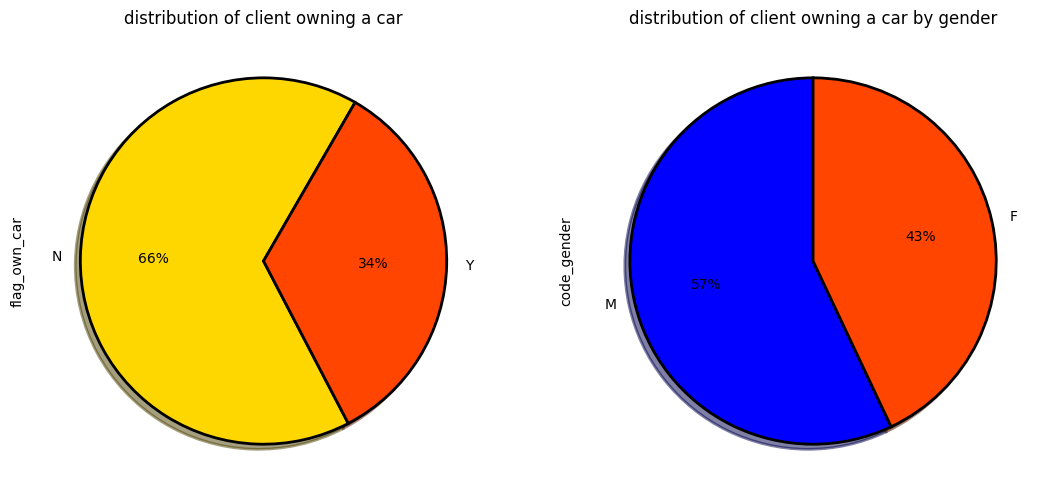

In [164]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["flag_own_car"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["flag_own_car"] == "Y"]["code_gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

from the graph:

SUBPLOT 1 : Distribution of client owning a car. 34% of clients own a car .

SUBPLOT 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

In [165]:
data.columns.to_list()

['sk_id_curr',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_2',
 'days_last_phone_change',
 'flag_document_3',
 'amt_income_total_2',
 'age',
 'age_grp',
 'years_employed',
 'emp_year',
 'years_last_phone_change',
 'type',
 'sk_id_prev',
 'amt_application',
 'flag_last_appl_per_contract',
 'nflag


Distribution of client owning a house or flat and by gender

FLAG_OWN_REALTY - Flag if client owns a house or flat


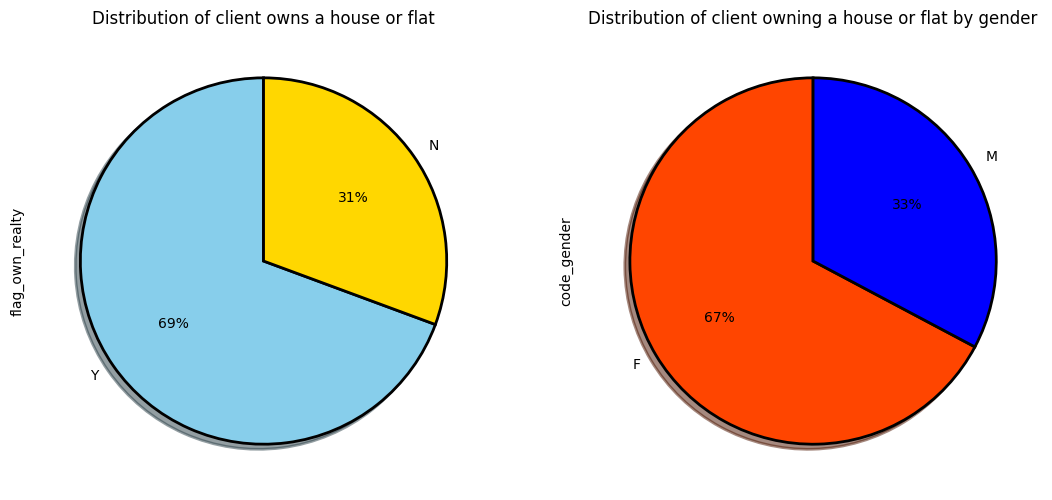

In [166]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["flag_own_realty"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["flag_own_realty"] == "Y"]["code_gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()



SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

### Distribution of contract type ,gender ,own car ,own house with respect to target

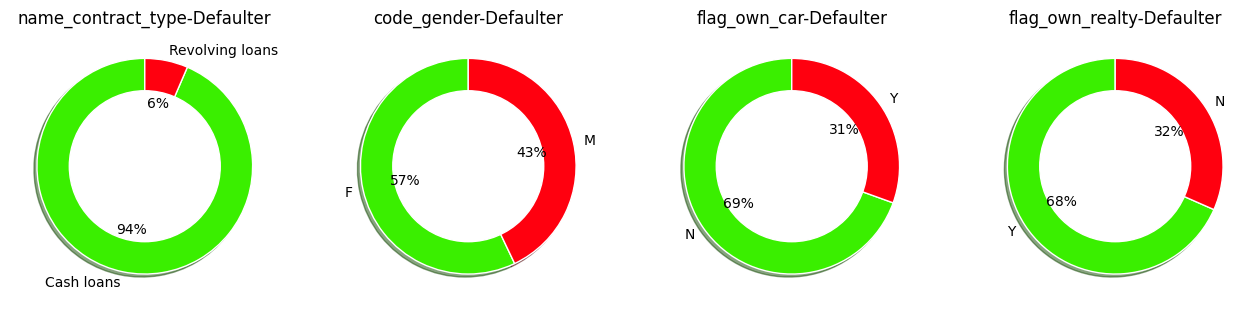

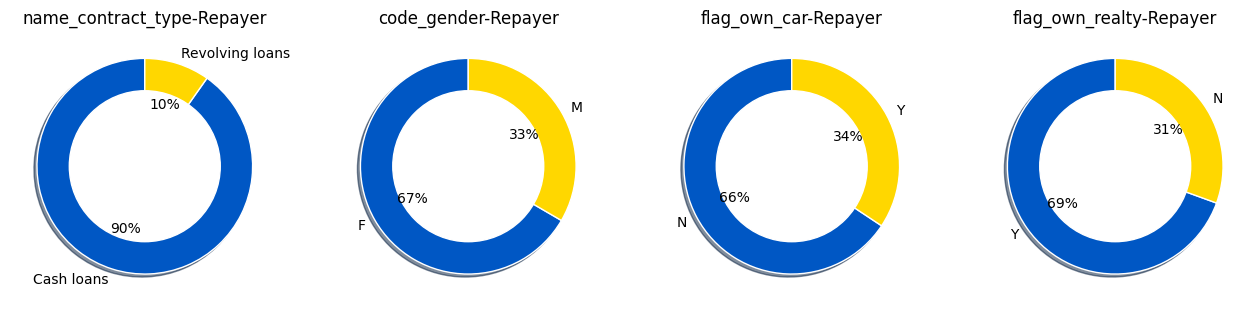

In [168]:
default = app_data[app_data["target"]==1][[ 'name_contract_type', 'code_gender','flag_own_car', 'flag_own_realty']]
non_default = app_data[app_data["target"]==0][['name_contract_type', 'code_gender','flag_own_car', 'flag_own_realty']]

d_cols = ['name_contract_type','code_gender','flag_own_car', 'flag_own_realty']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")


Percentage of males is 10% more in defaults than non defaulters.

Percentage of Cash Loans is 4% more in defaults than Revolving Loans.


### Distribution of Suite type


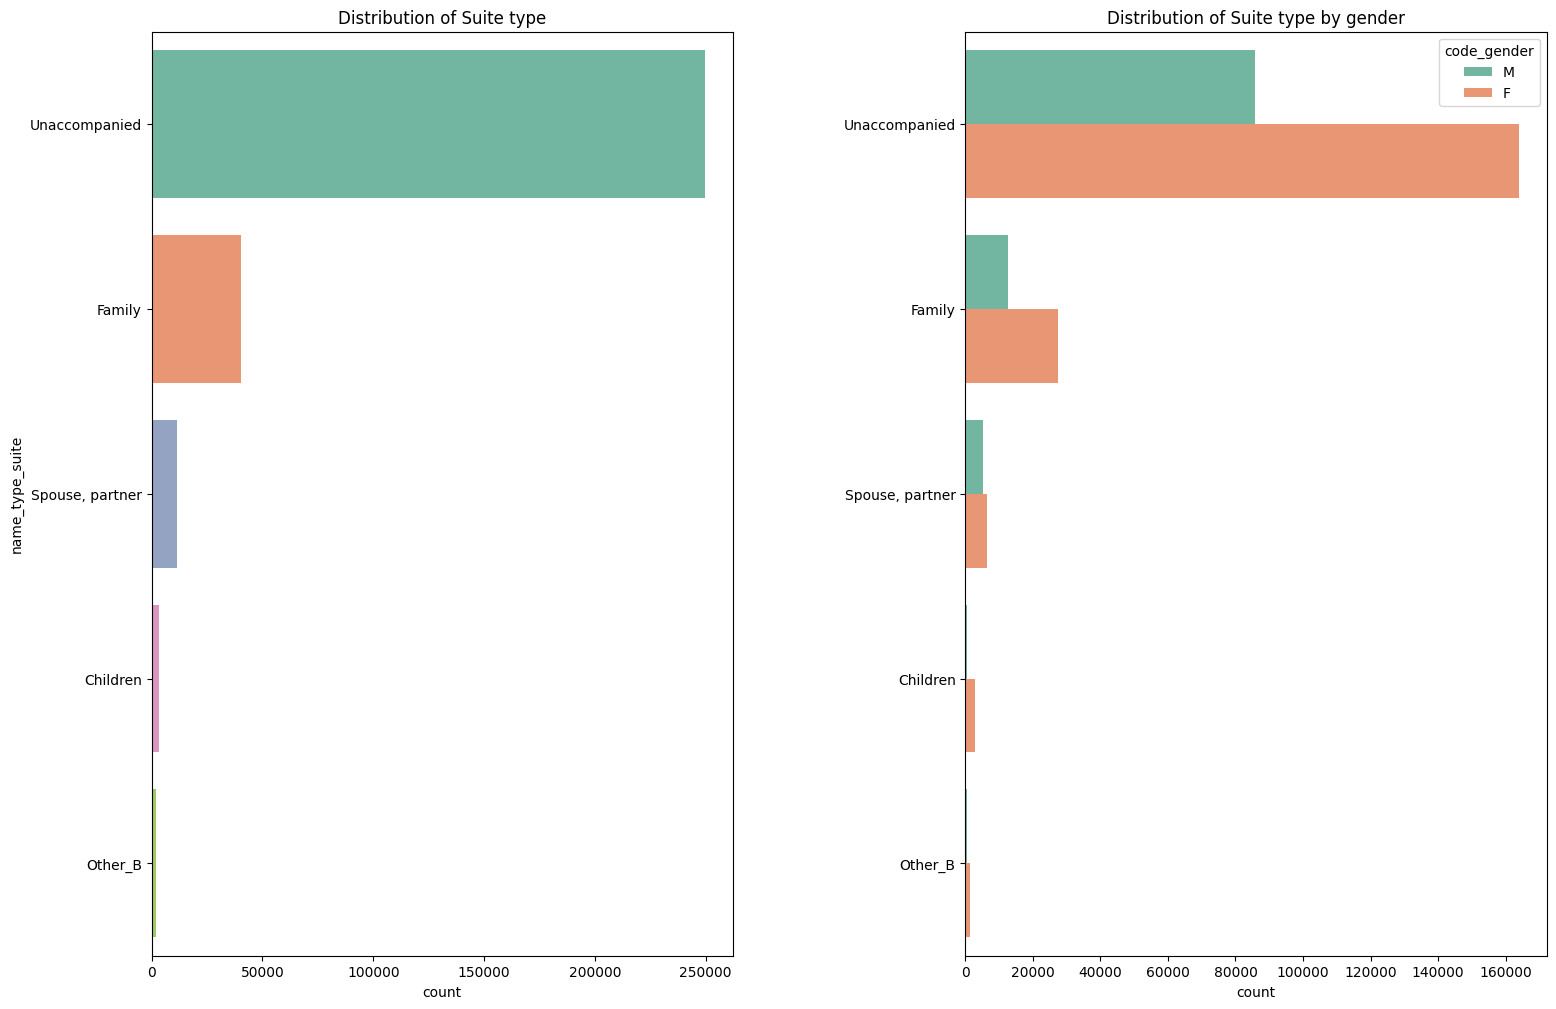

In [169]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["name_type_suite"],
              palette="Set2",
              order=data["name_type_suite"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=data["name_type_suite"],
              hue=data["code_gender"],palette="Set2",
              order=data["name_type_suite"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

### Distribution of client income type

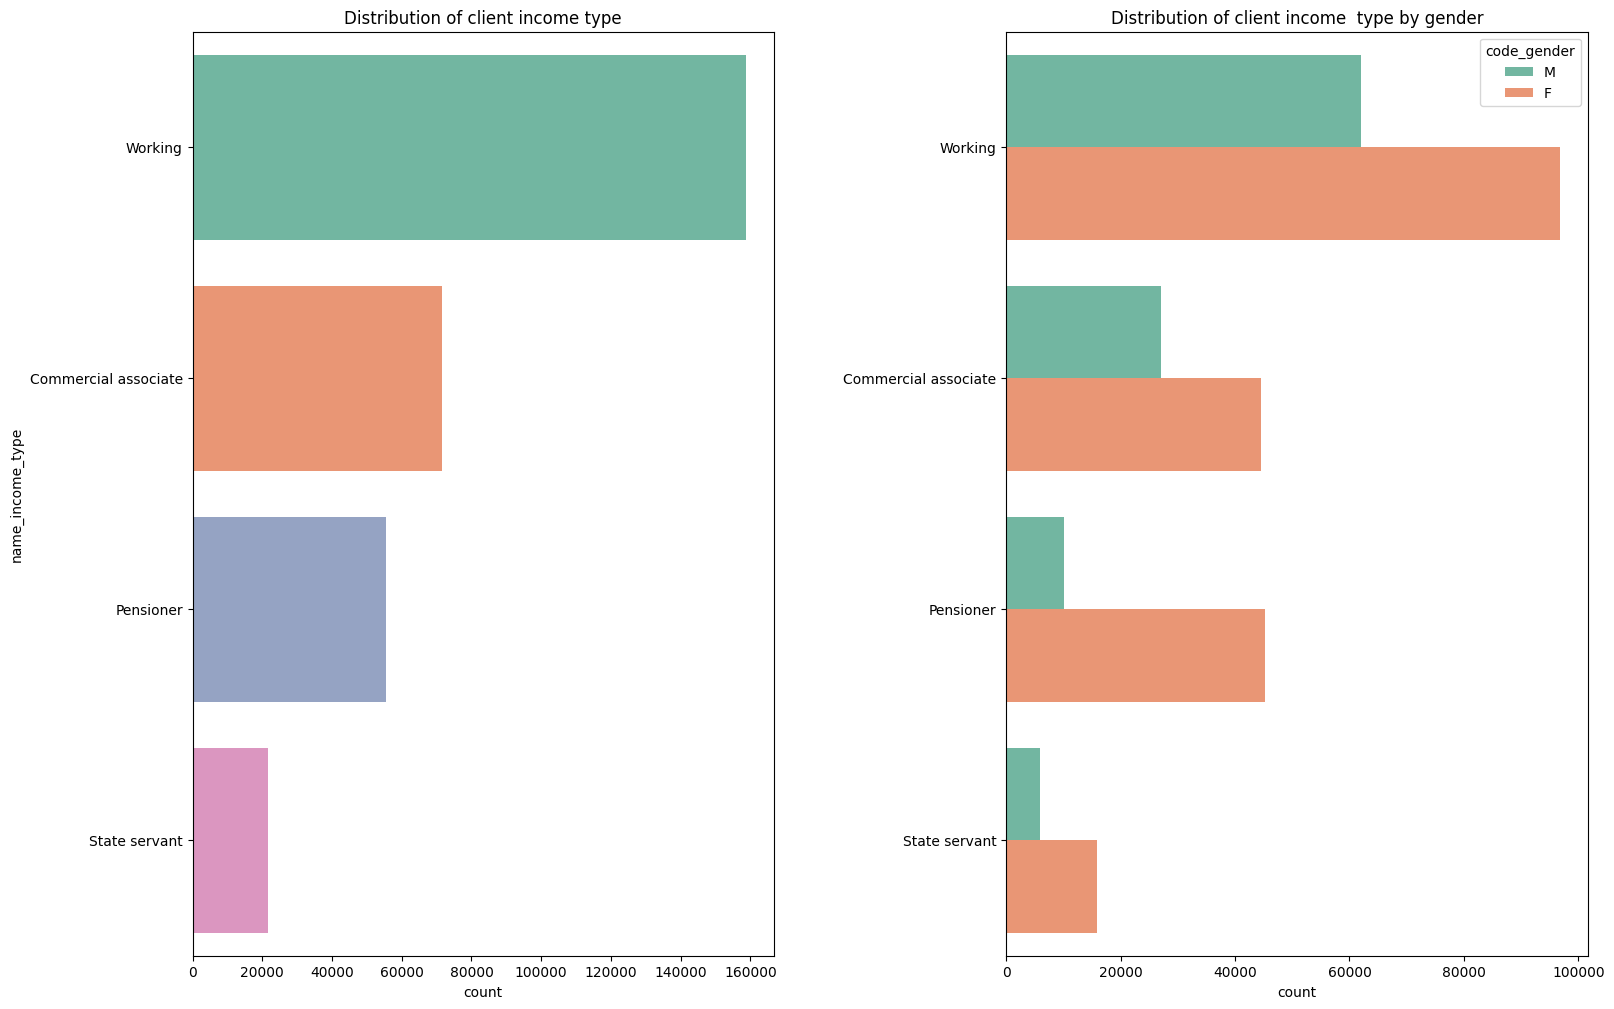

In [170]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=data["name_income_type"],
              palette="Set2",
              order=data["name_income_type"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=data["name_income_type"],
              hue=data["code_gender"],
              palette="Set2",
              order=data["name_income_type"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)



### Distribution of Education type by loan repayment status

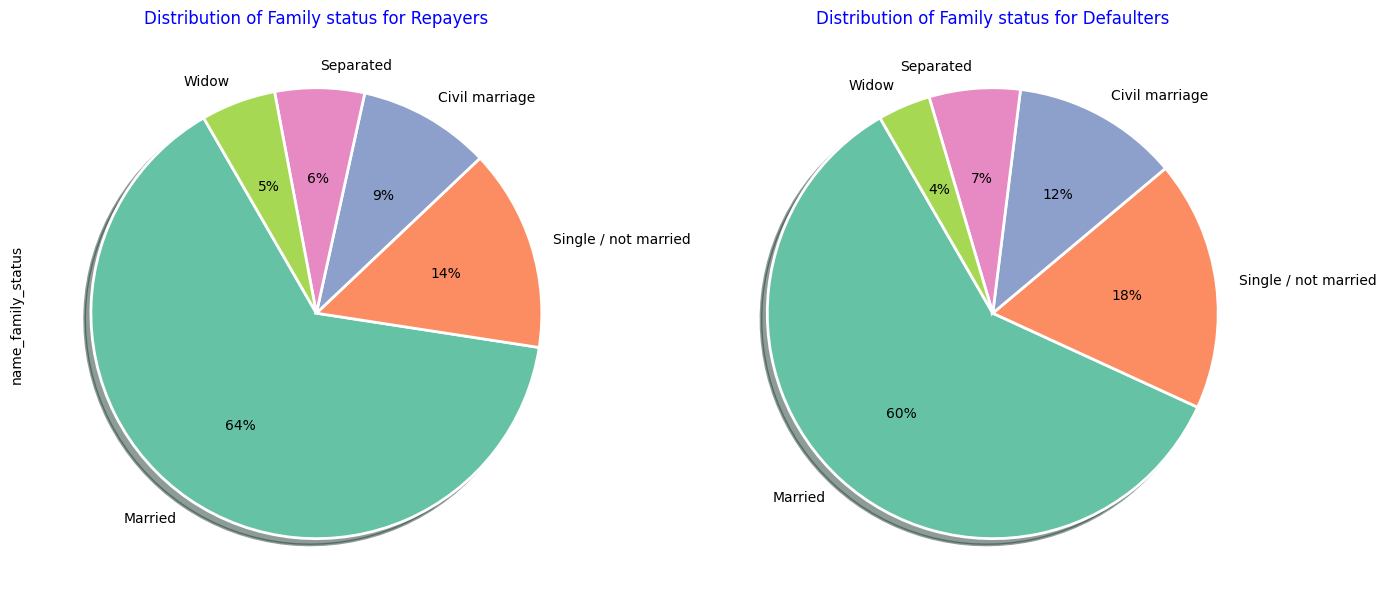

In [171]:


plt.figure(figsize=(16,8))
plt.subplot(121)
app_data[app_data["target"]==0]["name_family_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
app_data[app_data["target"]==1]["name_family_status"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()



### Distribution of Housing type by loan repayment status

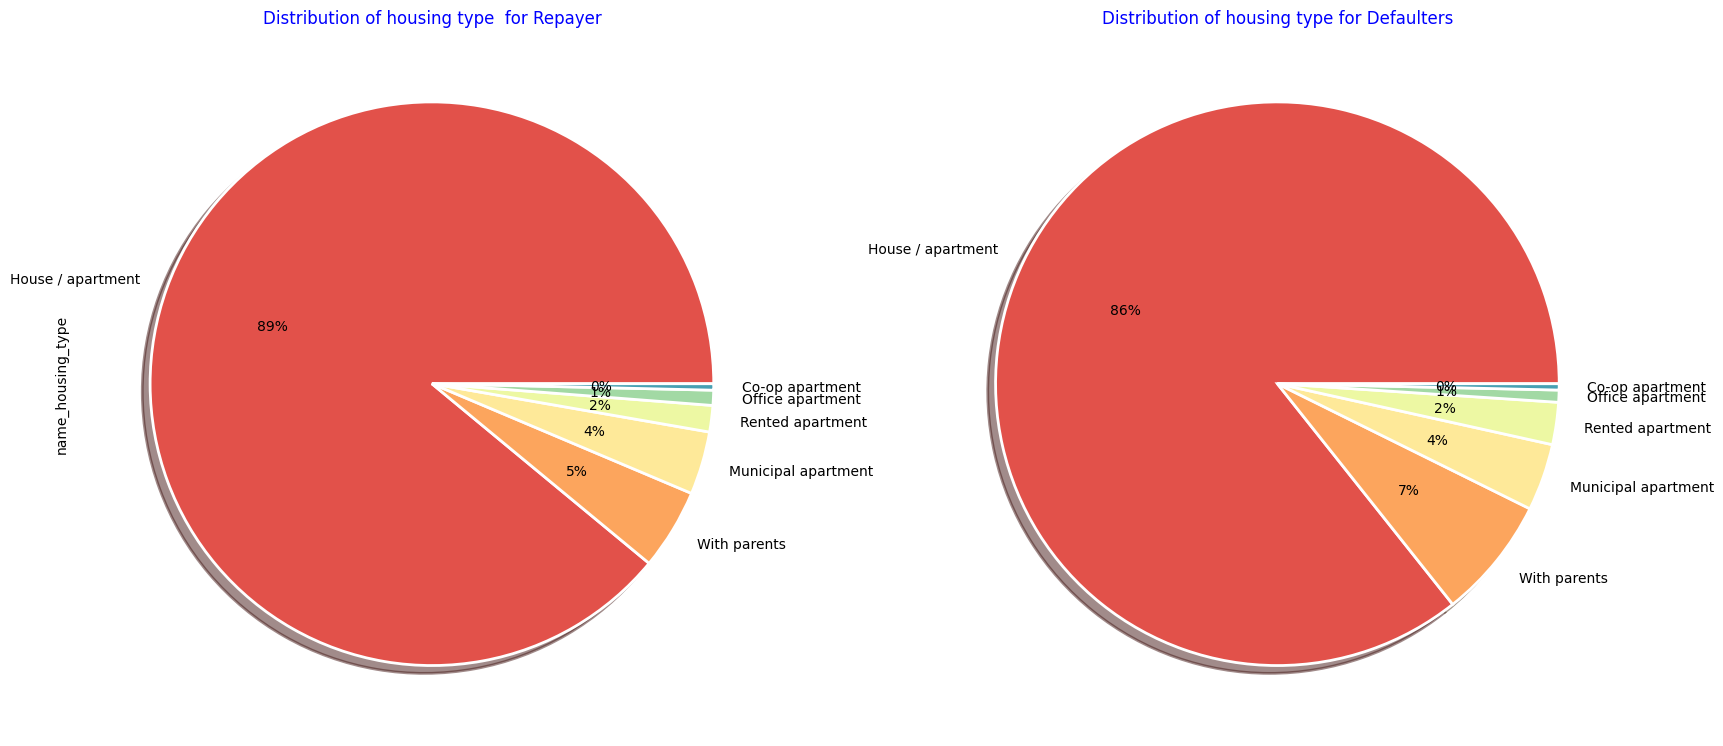

In [172]:


plt.figure(figsize=(20,20))
plt.subplot(121)
app_data[app_data["target"]==0]["name_housing_type"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
app_data[app_data["target"]==1]["name_housing_type"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()



### Distribution of registration days for target variable.

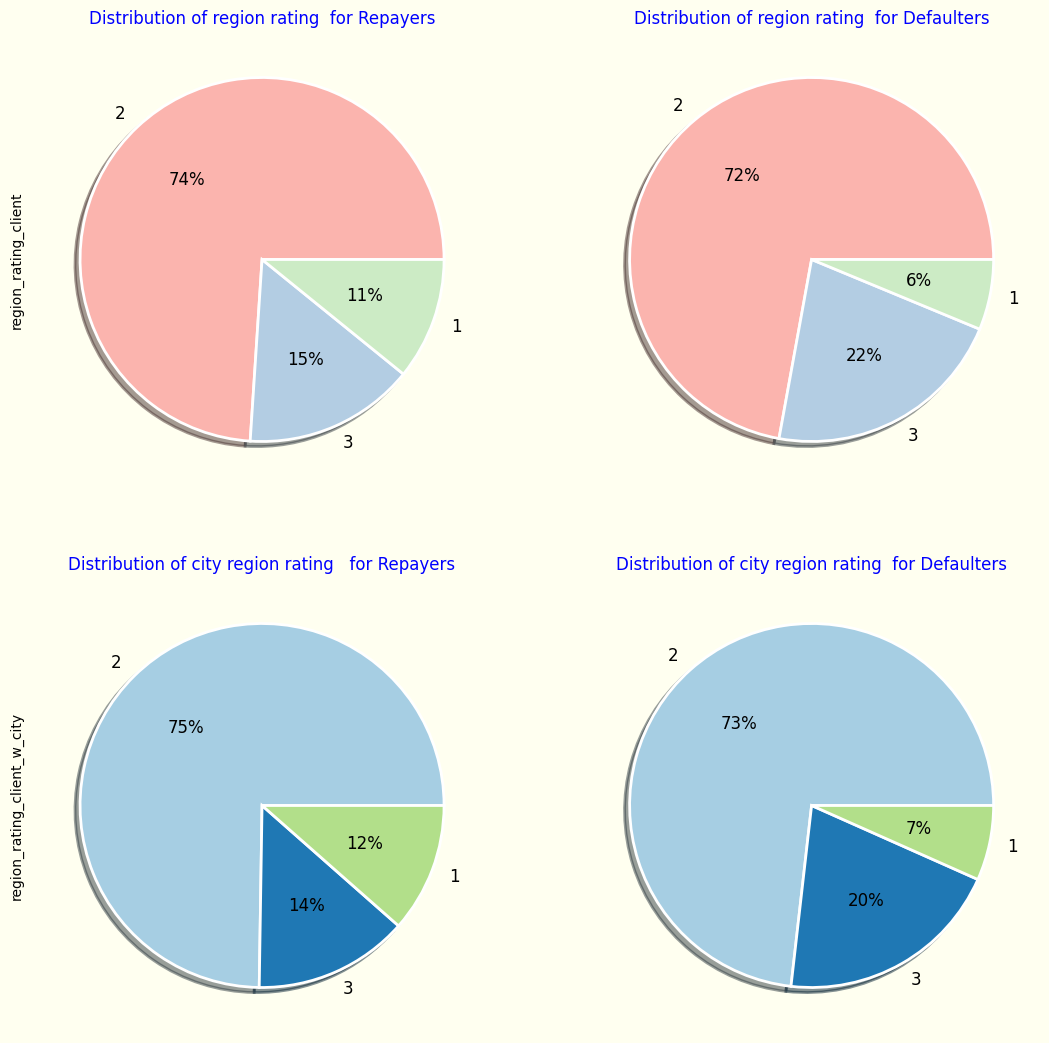

In [173]:


fig = plt.figure(figsize=(13,13))
plt.subplot(221)
app_data[app_data["target"]==0]["region_rating_client"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
app_data[app_data["target"]==1]["region_rating_client"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
app_data[app_data["target"]==0]["region_rating_client_w_city"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
app_data[app_data["target"]==1]["region_rating_client_w_city"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")



Percentage of defaulters are less in 1-rated regions compared to repayers.

Percentage of defaulters are more in 3-rated regions compared to repayers.

### Corelation between variables

Application Data

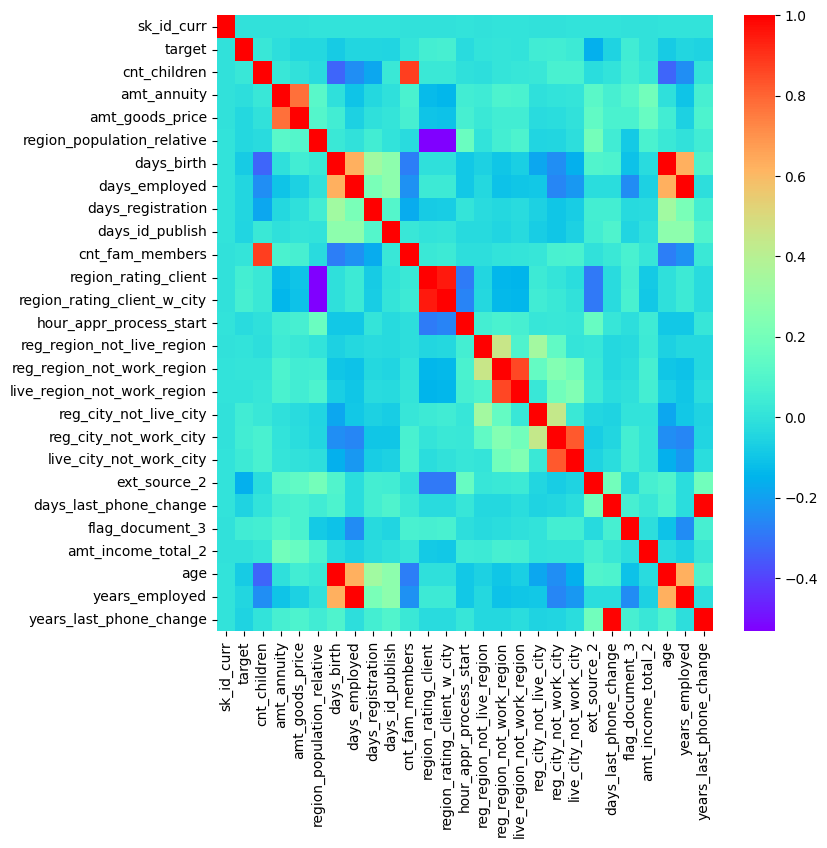

In [174]:
corrmat = app_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

Previous App

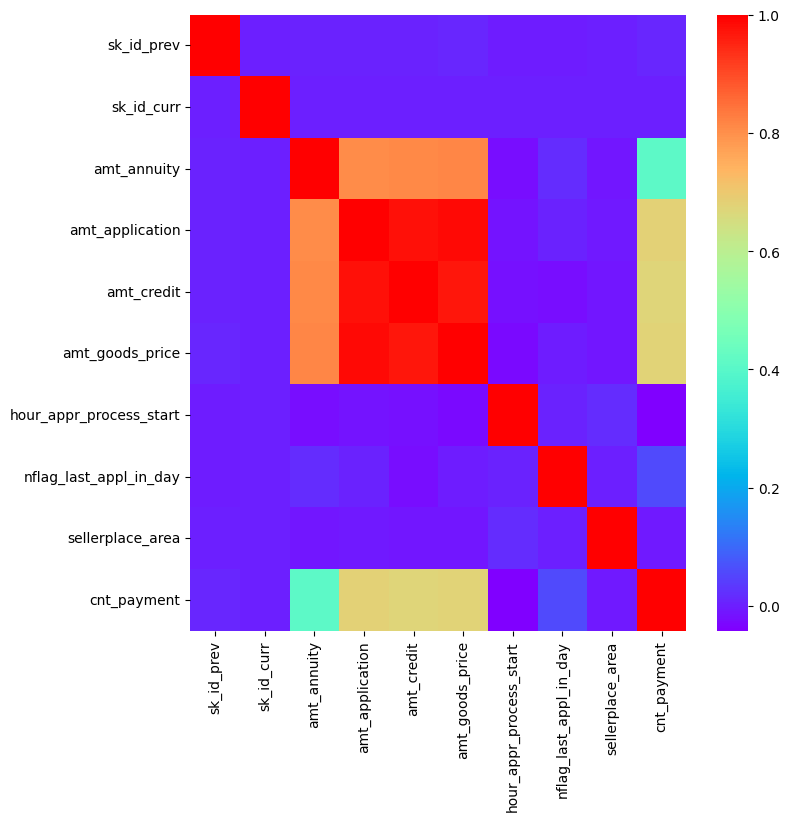

In [175]:
corrmat = prev_app_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [176]:
corrmat = prev_app_data.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


,Var1,Var2,Correlation
53,amt_goods_price,amt_application,0.99
43,amt_credit,amt_application,0.98
54,amt_goods_price,amt_credit,0.97
52,amt_goods_price,amt_annuity,0.82
32,amt_application,amt_annuity,0.81
42,amt_credit,amt_annuity,0.81
95,cnt_payment,amt_goods_price,0.68
93,cnt_payment,amt_application,0.68
94,cnt_payment,amt_credit,0.67
92,cnt_payment,amt_annuity,0.41


APP Data

In [177]:
df_repayer = app_data[app_data['target'] == 0]
df_defaulter = app_data[app_data['target'] == 1]

In [178]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
682,years_employed,days_employed,1.00
654,age,days_birth,1.00
723,years_last_phone_change,days_last_phone_change,0.99
335,region_rating_client_w_city,region_rating_client,0.95
272,cnt_fam_members,cnt_children,0.88
447,live_region_not_work_region,reg_region_not_work_region,0.86
531,live_city_not_work_city,reg_city_not_work_city,0.83
111,amt_goods_price,amt_annuity,0.78
195,days_employed,days_birth,0.63
681,years_employed,days_birth,0.63



Top 10 Correlation Fields for Defaulter

In [179]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
654,age,days_birth,1.00
682,years_employed,days_employed,1.00
723,years_last_phone_change,days_last_phone_change,0.99
335,region_rating_client_w_city,region_rating_client,0.96
272,cnt_fam_members,cnt_children,0.89
447,live_region_not_work_region,reg_region_not_work_region,0.85
531,live_city_not_work_city,reg_city_not_work_city,0.78
111,amt_goods_price,amt_annuity,0.75
681,years_employed,days_birth,0.58
655,age,days_employed,0.58


In [180]:


mergeddf =  pd.merge(app_data,prev_app_data,on='sk_id_curr')
mergeddf.head()



,sk_id_curr,target,name_contract_type_x,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit_x,amt_annuity_x,amt_goods_price_x,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start_x,hour_appr_process_start_x,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,days_last_phone_change,flag_document_3,amt_income_total_2,age,age_grp,years_employed,emp_year,years_last_phone_change,sk_id_prev,name_contract_type_y,amt_annuity_y,amt_application,amt_credit_y,amt_goods_price_y,weekday_appr_process_start_y,hour_appr_process_start_y,flag_last_appl_per_contract,nflag_last_appl_in_day,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination
0,100002,1,Cash loans,M,N,Y,0,200k-300k,400k-500k,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,1134.0,1,2.025,25,20-30,1,0-5,3.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,400-800,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,200k-300k,1M Above,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,828.0,1,2.700,45,40-50,3,0-5,2.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,400-800,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,200k-300k,1M Above,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,828.0,1,2.700,45,40-50,3,0-5,2.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,800-1200,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,200k-300k,1M Above,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,828.0,1,2.700,45,40-50,3,0-5,2.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2000-2400,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,0-100K,100K-200K,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,815.0,0,0.675,52,50 above,0,0-5,2.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,800-1200,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [181]:


y = mergeddf.groupby('sk_id_curr').size()
dfA = mergeddf.groupby('sk_id_curr').agg({'target': np.sum})
dfA['count'] = y
display(dfA.head(10))



,target,count
sk_id_curr,,
100002,1,1
100003,0,3
100004,0,1
100006,0,9
100007,0,6
100008,0,5
100009,0,7
100010,0,1
100011,0,4


In [182]:


df_repayer = dfA[dfA['target'] == 0]
df_defaulter = dfA[dfA['target'] == 1]




Repayers' Borrowing History

In [183]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

,target,count
sk_id_curr,,
265681,0,73
173680,0,72
242412,0,68
206783,0,67
382179,0,64
389950,0,64
198355,0,63
446486,0,62
345161,0,62



Defaulters' Borrowing History

In [184]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10)

,target,count
sk_id_curr,,
100002,1,1
333349,1,1
333587,1,1
333582,1,1
333534,1,1
333506,1,1
333419,1,1
333355,1,1
333337,1,1


### Decisive Factor whether an applicant will be Defaulter:



CODE_GENDER: Men are at relatively higher default rate

NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.

NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education

NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.

REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.

OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.

ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting

DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.



CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 4 default 100% and hence their applications are to be rejected.Client who have more than 4 children has a very high default rate with family including child count 9 and 11 showing 100% default rate

AMT_GOODS_PRICE: When the credit amount goes beyond 3 lakh, there is an increase in defaulters.
Customer will be Repayer(Non-defaulter)-

1- EDUCATION: Academic degree has less defaults.

INCOME: Student and Businessmen have no defaults.

RATING_CLIENT: RATING 1 is safer.

ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%

DAYS_BIRTH: People above age of 50 have low probability of defaulting

DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
CHILDREN: People with zero to two children tend to repay the loans.


### Building a prediction model via random forest




To build a prediction model, we should decide what kind of metric should be used to evaluate the prediction performance.

In reality, loan defaulters only occupied a small proportion of all applicants. Since our analysis goal is to identify loan defaulters and minimize the risk of losing money, we cannot just simply apply the precision rate (# of samples predicted correctly / # of total samples) as the evaluation metric. Why?

Here is an example:

Let's assume there is 1 loan defaulter among 100 clients. If we just simply predict all clients are good clients(clients with paying ability), the precision rate will be 99%. This is a good prediction if we just look at the precision rate (This prediction performance may be better than some algorithms!). But we all know this prediction has poor generalization ability since it isn't based on the features from the dataset. A more specific metric is needed in this scenario

On the other hand, we need to know all types of risks when banks offer loans to clients. From my perspective, there are two types of risk:

1、Offering loans to clients without paying ability, the bank is losing money.

In other words, we think this client is not a loan defaulter (The prediction is 0(False)), but actually, he/she is (the actual result is 1(True) from the 'TARGET' column) (False-Positive, Type I error)

2、Rejecting clients' applications with paying ability, resulting in loss of business.

We think this client is a loan defaulter (The prediction is 1(True) but he/she is not(The actual result is 0(False) from the 'TARGET' column) (False-Negative, type II error)

Logically speaking, we should pay attention to the Type I error since it will result in the real financial loss while the type II error would only result in losing business opportunities.

In other words, when we build prediction models and compare their performance, we need a metric to select the model with the lowest False positive rate when all models are the same True positive rate. Under this pre-condition, 'ROC_AUC_SCORE' would be a good choice.


In [185]:
app_data.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,days_last_phone_change,flag_document_3,amt_income_total_2,age,age_grp,years_employed,emp_year,years_last_phone_change
32803,138015,1,Cash loans,F,N,Y,0,200k-300k,400k-500k,17383.5,405000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.016612,20551,12650,14274.0,1539,Accountants,2.0,2,2,WEDNESDAY,15,0,0,0,0,1,1,Other,0.647103,984.0,1,2.25,56,50 above,34,30-40,2.0


In [186]:
X = app_data.drop(['target','sk_id_curr'],axis=1)
y = app_data['target']

In [187]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [188]:
corr_features = correlation(X, 0.4)
app_df_corr = X.drop(corr_features, axis=1)
#X_test_corr = X_test_var.drop(corr_features, axis=1)
n_features3 = app_df_corr.shape[1]
print(f'After removing {len(corr_features)} features, there are {n_features3} features left.')

After removing 12 features, there are 29 features left.


In [189]:
app_df_corr['target'] = app_data['target']
app_df_corr['sk_id_curr'] = app_data['sk_id_curr']

In [190]:
features_to_ohe_encode = ['name_contract_type','amt_income_total','amt_credit','name_type_suite','name_income_type','name_education_type','name_family_status','name_housing_type','occupation_type','weekday_appr_process_start','organization_type','age_grp','emp_year']
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
myEncoder.fit(app_df_corr[features_to_ohe_encode])
column_name = myEncoder.get_feature_names_out(['name_contract_type','amt_income_total','amt_credit','name_type_suite','name_income_type','name_education_type','name_family_status','name_housing_type','occupation_type','weekday_appr_process_start','organization_type','age_grp','emp_year'])
df_2 =pd.DataFrame(myEncoder.transform(app_df_corr[features_to_ohe_encode]))
df_2.columns = column_name

In [191]:
app_df_corr = pd.concat([app_df_corr.drop(features_to_ohe_encode, 1),df_2], axis=1).reindex()

In [192]:
features_to_encode = [
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
]
le = LabelEncoder()
app_df_corr[features_to_encode] = app_df_corr[features_to_encode].apply(le.fit_transform)

In [193]:
app_df_corr.sample()

,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_annuity,region_population_relative,days_birth,days_registration,days_id_publish,hour_appr_process_start,reg_region_not_live_region,reg_city_not_live_city,ext_source_2,days_last_phone_change,flag_document_3,amt_income_total_2,target,sk_id_curr,name_contract_type_Cash loans,name_contract_type_Revolving loans,amt_income_total_0-100K,amt_income_total_100K-200K,amt_income_total_1M Above,amt_income_total_200k-300k,amt_income_total_300k-400k,amt_income_total_400k-500k,amt_income_total_500k-600k,amt_income_total_600k-700k,amt_income_total_700k-800k,amt_income_total_800k-900k,amt_income_total_900k-1M,amt_credit_0-100K,amt_credit_100K-200K,amt_credit_1M Above,amt_credit_200k-300k,amt_credit_300k-400k,amt_credit_400k-500k,amt_credit_500k-600k,amt_credit_600k-700k,amt_credit_700k-800k,amt_credit_800k-900k,amt_credit_900k-1M,name_type_suite_Children,name_type_suite_Family,name_type_suite_Group of people,name_type_suite_Other_A,name_type_suite_Other_B,"name_type_suite_Spouse, partner",name_type_suite_Unaccompanied,name_income_type_Businessman,name_income_type_Commercial associate,name_income_type_Maternity leave,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Unemployed,name_income_type_Working,name_education_type_Academic degree,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Civil marriage,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_Co-op apartment,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,occupation_type_Accountants,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,weekday_appr_process_start_FRIDAY,weekday_appr_process_start_MONDAY,weekday_appr_process_start_SATURDAY,weekday_appr_process_start_SUNDAY,weekday_appr_process_start_THURSDAY,weekday_appr_process_start_TUESDAY,weekday_appr_process_start_WEDNESDAY,organization_type_Advertising,organization_type_Agriculture,organization_type_Bank,organization_type_Business Entity Type 1,organization_type_Business Entity Type 2,organization_type_Business Entity Type 3,organization_type_Cleaning,organization_type_Construction,organization_type_Culture,organization_type_Electricity,organization_type_Emergency,organization_type_Government,organization_type_Hotel,organization_type_Housing,organization_type_Industry: type 1,organization_type_Industry: type 10,organization_type_Industry: type 11,organization_type_Industry: type 12,organization_type_Industry: type 13,organization_type_Industry: type 2,organization_type_Industry: type 3,organization_type_Industry: type 4,organization_type_Industry: type 5,organization_type_Industry: type 6,organization_type_Industry: type 7,organization_type_Industry: type 8,organization_type_Industry: type 9,organization_type_Insurance,organization_type_Kindergarten,organization_type_Legal Services,organization_type_Medicine,organization_type_Military,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organizatio

In [194]:
def Zero_Variance(df):
    try:
        X = df.drop(['target','sk_id_curr'],axis=1)
        y = df['target']
        sel = VarianceThreshold(threshold = 0.02)
        X_reduced = sel.fit_transform(X, y)
        cols = sel.get_support(indices=True)
        df_selected_columns = X.iloc[:,cols].columns.tolist()
        dropped_cols = list(set(X.columns) - set(df_selected_columns))
        #print(dropped_cols)
        print('DF Orig Shape' , X.shape)
        print('DF AFTER Shape' , X_reduced.shape)
        return df_selected_columns
    except ValueError:
        print("No feature is strong enough to keep")
        sel = []

In [195]:
app_df_corr_cols = Zero_Variance(app_df_corr)
app_df_corr = app_data[app_df_corr_cols]

DF Orig Shape (307511, 166)
DF AFTER Shape (307511, 84)


KeyError: "['name_contract_type_Cash loans', 'name_contract_type_Revolving loans', 'amt_income_total_0-100K', 'amt_income_total_100K-200K', 'amt_income_total_200k-300k', 'amt_income_total_300k-400k', 'amt_credit_100K-200K', 'amt_credit_1M Above', 'amt_credit_200k-300k', 'amt_credit_300k-400k', 'amt_credit_400k-500k', 'amt_credit_500k-600k', 'amt_credit_600k-700k', 'amt_credit_700k-800k', 'amt_credit_800k-900k', 'amt_credit_900k-1M', 'name_type_suite_Family', 'name_type_suite_Spouse, partner', 'name_type_suite_Unaccompanied', 'name_income_type_Commercial associate', 'name_income_type_Pensioner', 'name_income_type_State servant', 'name_income_type_Working', 'name_education_type_Higher education', 'name_education_type_Incomplete higher', 'name_education_type_Secondary / secondary special', 'name_family_status_Civil marriage', 'name_family_status_Married', 'name_family_status_Separated', 'name_family_status_Single / not married', 'name_family_status_Widow', 'name_housing_type_House / apartment', 'name_housing_type_Municipal apartment', 'name_housing_type_With parents', 'occupation_type_Accountants', 'occupation_type_Core staff', 'occupation_type_Drivers', 'occupation_type_High skill tech staff', 'occupation_type_Laborers', 'occupation_type_Managers', 'occupation_type_Medicine staff', 'occupation_type_Sales staff', 'occupation_type_Security staff', 'weekday_appr_process_start_FRIDAY', 'weekday_appr_process_start_MONDAY', 'weekday_appr_process_start_SATURDAY', 'weekday_appr_process_start_SUNDAY', 'weekday_appr_process_start_THURSDAY', 'weekday_appr_process_start_TUESDAY', 'weekday_appr_process_start_WEDNESDAY', 'organization_type_Business Entity Type 2', 'organization_type_Business Entity Type 3', 'organization_type_Construction', 'organization_type_Government', 'organization_type_Kindergarten', 'organization_type_Medicine', 'organization_type_Other', 'organization_type_School', 'organization_type_Self-employed', 'organization_type_Trade: type 7', 'organization_type_XNA', 'age_grp_20-30', 'age_grp_30-40', 'age_grp_40-50', 'age_grp_50 above', 'emp_year_0-5', 'emp_year_10-20', 'emp_year_100-1000', 'emp_year_20-30', 'emp_year_5-10'] not in index"

In [196]:
app_df_corr.columns

Index(['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_annuity', 'region_population_relative', 'days_birth',
       'days_registration', 'days_id_publish', 'hour_appr_process_start',
       ...
       'age_grp_30-40', 'age_grp_40-50', 'age_grp_50 above', 'emp_year_0-5',
       'emp_year_10-20', 'emp_year_100-1000', 'emp_year_20-30',
       'emp_year_30-40', 'emp_year_40-50', 'emp_year_5-10'],
      dtype='object', length=168)

In [197]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    # Parameters:
    # 1、 estimator - prediction model object
    # 2、 title - The title of the diagram
    # 3、 X - training dataset
    # 4、 y - label dataset
    # 5、 ylim - the range of y axis
    # 6、 cv - the number of cross-validation
    # 7、 training_sizes - the pct of the total training samples
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # mean and std score of both train and test dataset
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Detail setting
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [200]:
# Split the train_df
features_df = app_df_corr.drop('target', axis=1)
labels_df = app_df_corr['target']
train_dummies = pd.get_dummies(features_df)

X_train, X_test, Y_train, Y_test = train_test_split(train_dummies, labels_df, random_state=1)
print('The spliting process has finished!')


# build the pipeline for random forest
rfc_model = RandomForestClassifier(random_state=1, max_depth=3)
select_rfc = SelectFromModel(rfc_model, threshold="median")
para_grid = [{'feature_selection': [select_rfc], 
              'classifier__n_estimators': np.arange(50, 150, 10)}]
pipe = Pipeline([('feature_selection', select_rfc), ('classifier', rfc_model)])
grid = GridSearchCV(pipe, param_grid=para_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid.fit(X_train, Y_train)
best_model = grid.best_estimator_
best_score = grid.best_score_
print(best_model)
print(best_score)

The spliting process has finished!
Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=3,
                                                                  random_state=1),
                                 threshold='median')),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=80,
                                        random_state=1))])
0.6794135149062079


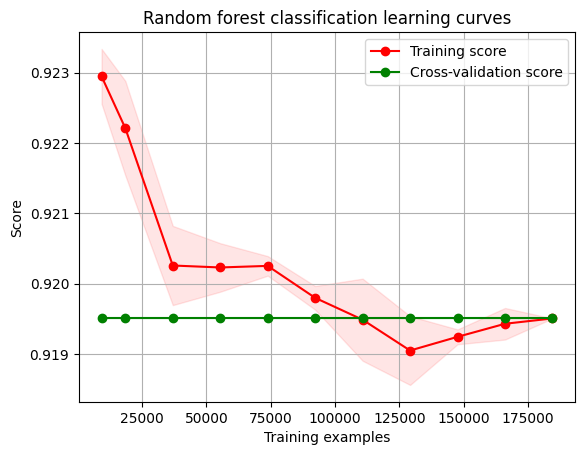

In [201]:
# plot learning curve and evaluate the performance of the best rfm setting
rfc_best = RandomForestClassifier(n_estimators=120, max_depth=3, random_state=1)
rfc_learning_curve = plot_learning_curve(rfc_best, "Random forest classification learning curves", 
                                         X_train, Y_train, cv = 5, 
                                         train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])




As we can see from the diagram, the training and cross-validation score converge towards the same limit when the training samples increase, and the score performance is good. This means the prediction model neither has overfitted nor underfit problems.

(if the model has to underfit problems, both score performance of training and cross_validation dataset will be low;

On the other hand, if the model has overfitted problems, the training and cross-validation score converge towards the same limit but there is a obvious gap between them when the training example reached its maximum value)


In [203]:
# test the prediction performance using the X-train dataset
rfc_best.fit(X_train, Y_train)
Y_predict = rfc_best.predict_proba(X_test)[:,1]
print(Y_predict)
print(rfc_best.classes_)
print(roc_auc_score(Y_test, Y_predict))

[0.05893543 0.10672293 0.0846842  ... 0.10208926 0.05931396 0.08881386]
[0 1]
0.6817569274529922




Here are the instructions for evaluating model performance through roc_auc_score:

1、roc_auc_score=0.5, the model has no diagnostic value because the model just randomly 'guesses' a value as the prediction result.

2、0.5 < roc_auc_score < 0.7, the model can predict the tendency of loan defaulters, but the precision rate is not good at all.

3、0.7 < roc_auc_score < 0.9, the model can predict the tendency of loan defaulters with a reasonably good precision rate.

4、0.9 < roc_auc_score < 1, the model can predict whether the applicant is a loan defaulter at a high precision rate.


In [205]:
# Print out the ro curve for reference
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
result = pd.DataFrame([thresholds,tpr,fpr], index= ['threshold','TPR','FPR']) 
print(result)

              0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98    

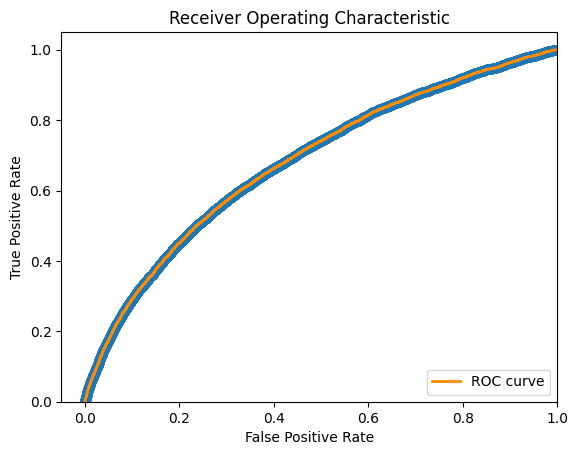

In [206]:
plt.figure() 
plt.scatter(fpr, tpr) 
# plot the roc curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve') 
plt.xlim([-0.05, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
     

In [207]:


# print out the feature importance
feature_importance_df = pd.DataFrame(data=rfc_best.feature_importances_, index=rfc_best.feature_names_in_)
feature_importance_df.sort_values(0, ascending=False, inplace=True)
print(feature_importance_df)



                                                          0
ext_source_2                                       0.198245
emp_year_0-5                                       0.071763
days_birth                                         0.071308
name_education_type_Higher education               0.063895
age_grp_50 above                                   0.062161
age_grp_20-30                                      0.058011
days_last_phone_change                             0.050788
name_income_type_Working                           0.043290
code_gender                                        0.043145
name_education_type_Secondary / secondary special  0.037948
organization_type_XNA                              0.035702
days_id_publish                                    0.035464
flag_document_3                                    0.023681
emp_year_10-20                                     0.017809
emp_year_100-1000                                  0.017239
name_contract_type_Cash loans           

### Conclusion


Decisive Factor whether an applicant will be a defaulter:


CODE_GENDER: Men have a relatively higher defaulter rate than women
NAME_EDUCATION_TYPE: Applicants with Lower Secondary & Secondary education has higher risk of rejecting repay loans
YEARS_BIRTH: Young adults (age under 30) have the higher defaulter rate
YEARS_EMPLOYED: People who have less than 5 years of employment have a relatively high defaulting rate.
OCCUPATION_TYPE: Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff are the high-risk occupation since the defaulting rate is huge.
ORGANIZATION_TYPE: The top 5 high-risk organization types are: Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 more children (6 more family members) will have a higher defaulting rate than the other groups.
NAME_TYPE_SUITE: Other_B type have the highest defaulting rate
NAME_FAMILY_STATUS: People who have civil marriages or who are single default a lot.
NAME_HOUSING_TYPE: Rented apartments or living with parents will potentially increase the risk of rejecting repaying loans.
OWN_CAR_AGE: Applicants own cars with 10+ years has relative higher defaulting rate.
NAME_INCOME_TYPE: Clients who are either on Maternity leave OR Unemployed default a lot.
REGION_RATING_CLIENT: People who live in the area with Rating 3 have the highest defaults.
NAME_CONTRACT_TYPE: Application with cash loans has more risk of losing loans than revolving loans.
AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

In terms of the loan defaulter data, there are no clear boundaries to classify the loan defaulters, so I summarize the top 10 characteristics showing up most frequently in loan defaulters.




   


NAME_CONTRACT_TYPE_Cash loans,

NAME_HOUSING_TYPE_House / apartment,

NAME_TYPE_SUITE_Unaccopanied,

NAME_EDUCATION_TYPE_Secondary/secondary special,

REGION_RATING_CLIENT_W_CITY_2,

OWN_CAR_AGE_Unkown,

FLAG_OWN_CAR_N,

FLAG_OWN_REALITY_Y,

CNT_CHILDREN_No_Child,

NAME_INCOME_TYPE_Working.



To predict whether a client is a loan defaulter or not, the random forest with the best parameter setting can give a reasonably good reference according to the auc_roc_score.
